In [104]:
# !/usr/bin/python
# -*- coding: utf-8 -*-
# Author: Selvaria
# 卓创价格整合和作图

import pymysql
import matplotlib.pyplot as plt
import pandas

In [344]:
#分主营和地炼
#弃用

def get_data_3years(o_type, f_type):
    
    connection = pymysql.connect(host = '39.105.9.20',user = 'root',password = 'bigdata_oil',db = 'cxd_data',charset = 'utf8')

    sql_2017 = "SELECT ANY_VALUE(k.type),date,avg(price) FROM out_price_factory_value v JOIN out_price_factory_key k ON k.id = v.ref_key_id \
    WHERE source_id = '3' AND k.`type` like '{0}' and price > 100 and factory_type{1}\
    and date >= '2017-01-01' and date < '2018-01-01' group by date order by date".format(o_type, f_type)
    sql_2018 = "SELECT ANY_VALUE(k.type),date,avg(price) FROM out_price_factory_value v JOIN out_price_factory_key k ON k.id = v.ref_key_id \
    WHERE source_id = '3' AND k.`type` like '{0}' and price > 100 and factory_type{1}\
    and date >= '2018-01-01' and date < '2019-01-01' group by date order by date".format(o_type, f_type)
    sql_2019 = "SELECT ANY_VALUE(k.type),date,avg(price) FROM out_price_factory_value v JOIN out_price_factory_key k ON k.id = v.ref_key_id \
    WHERE source_id = '3' AND k.`type` like '{0}' and price > 100 and factory_type{1}\
    and date >= '2019-01-01' and date < '2020-01-01' group by date order by date".format(o_type, f_type)
    df_2017 = pandas.read_sql(sql_2017, connection)
    df_2018 = pandas.read_sql(sql_2018, connection)
    df_2019 = pandas.read_sql(sql_2019, connection)
    
    return df_2017, df_2018, df_2019

dfz_0g6_2017, dfz_0g6_2018, dfz_0g6_2019 = get_data_3years('%0#国六%', '="主营炼厂"') #主营0号国六柴油
dfz_0g5_2017, dfz_0g5_2018, dfz_0g5_2019 = get_data_3years('%0#国五%', '="主营炼厂"') #主营0号国六柴油
dfd_0g6_2017, dfd_0g6_2018, dfd_0g6_2019 = get_data_3years('%0#国六%', "!='主营炼厂'") #地炼0号国六柴油
dfd_0g5_2017, dfd_0g5_2018, dfd_0g5_2019 = get_data_3years('%0#国五%', "!='主营炼厂'") #地炼0号国六柴油

dfz_92_2017, dfz_92_2018, dfz_92_2019 = get_data_3years('%92#%', '="主营炼厂"') #主营92号汽油
dfz_95_2017, dfz_95_2018, dfz_95_2019 = get_data_3years('%95#%', '="主营炼厂"') #主营95号汽油
dfd_92_2017, dfd_92_2018, dfd_92_2019 = get_data_3years('%92#%', "!='主营炼厂'") #地炼92号汽油
dfd_95_2017, dfd_95_2018, dfd_95_2019 = get_data_3years('%95#%', "!='主营炼厂'") #地炼95号汽油

dfz_0g6_2018.head()

ANY_VALUE(k.type)        date  avg(price)
0              0#国六  2018-01-02     6316.25
1              0#国六  2018-01-03     6273.75
2              0#国六  2018-01-04     6348.75
3              0#国六  2018-01-05     6293.75
4              0#国六  2018-01-08     6318.75

In [347]:
dfz_0g6_2019.head()

ANY_VALUE(k.type)        date   avg(price) monthday
0          车柴-10#国六  2019-05-26  7023.075949    05-26
1          车柴-10#国六  2019-05-27  7023.075949    05-27
2          车柴-10#国六  2019-05-28  7079.113924    05-28
3          车柴-10#国六  2019-05-29  7079.113924    05-29
4          车柴-10#国六  2019-05-30  7079.113924    05-30

<IPython.core.display.Javascript object>


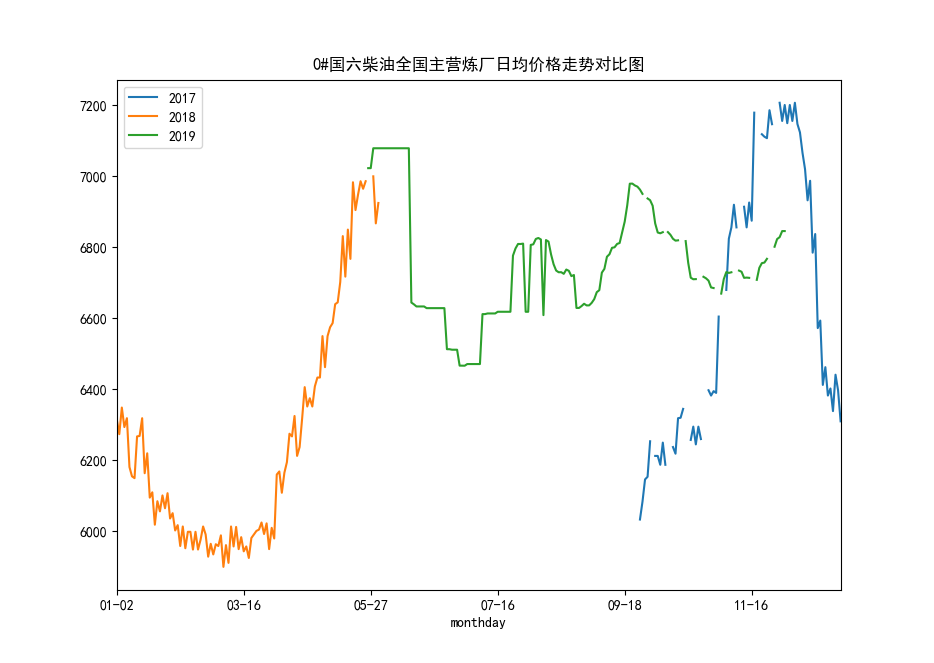

In [346]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

r0g6 = handle_df(dfz_0g6_2017, dfz_0g6_2018, dfz_0g6_2019)

ax = r0g6.plot(x='monthday', y='avg(price)_x', label='2017', title='0#国六柴油全国主营炼厂日均价格走势对比图')
r0g6.plot(x='monthday', y='avg(price)_y', label='2018', ax=ax)
r0g6.plot(x='monthday', y='avg(price)', label='2019', ax=ax)

<IPython.core.display.Javascript object>


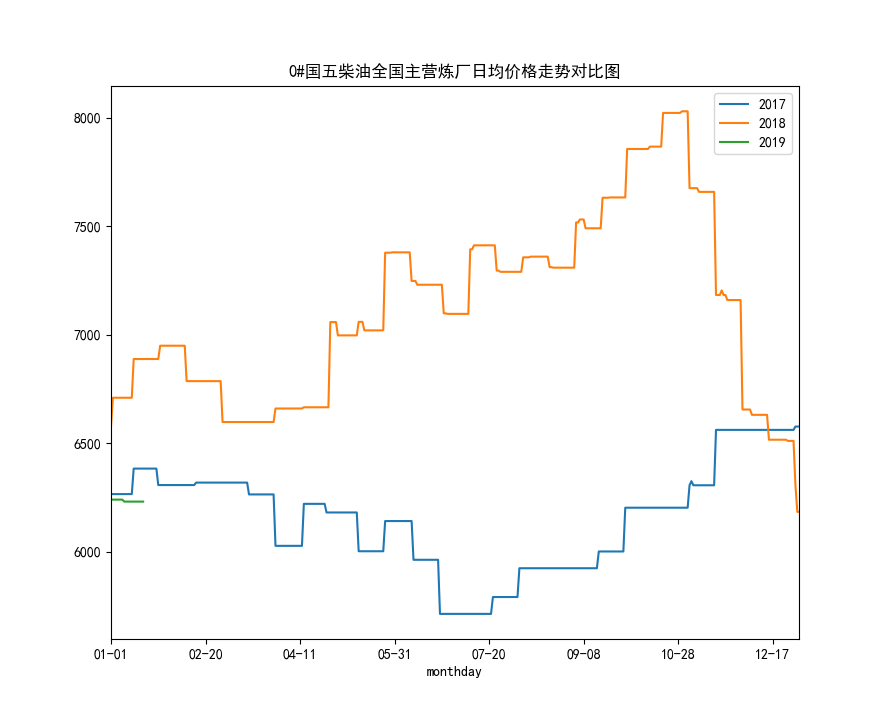

In [348]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

r0g5 = handle_df(dfz_0g5_2017, dfz_0g5_2018, dfz_0g5_2019)

ax = r0g5.plot(x='monthday', y='avg(price)_x', label='2017', title='0#国五柴油全国主营炼厂日均价格走势对比图')
r0g5.plot(x='monthday', y='avg(price)_y', label='2018', ax=ax)
r0g5.plot(x='monthday', y='avg(price)', label='2019', ax=ax)

<IPython.core.display.Javascript object>


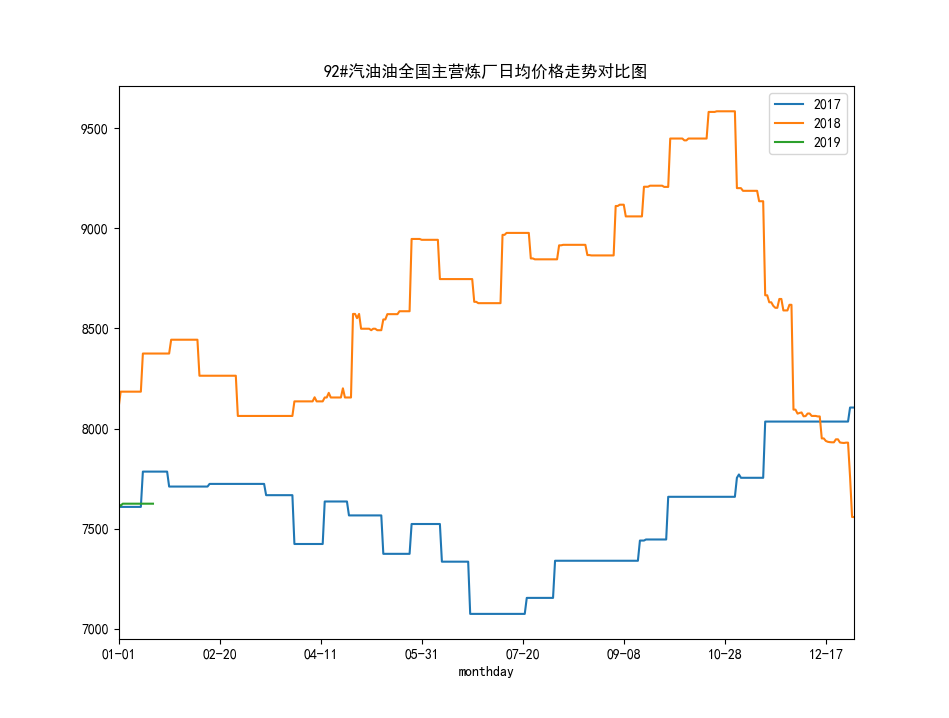

In [349]:

r92 = handle_df(dfz_92_2017, dfz_92_2018, dfz_92_2019)

ax = r92.plot(x='monthday', y='avg(price)_x', label='2017', title='92#汽油油全国主营炼厂日均价格走势对比图')
r92.plot(x='monthday', y='avg(price)_y', label='2018', ax=ax)
r92.plot(x='monthday', y='avg(price)', label='2019', ax=ax)

<IPython.core.display.Javascript object>


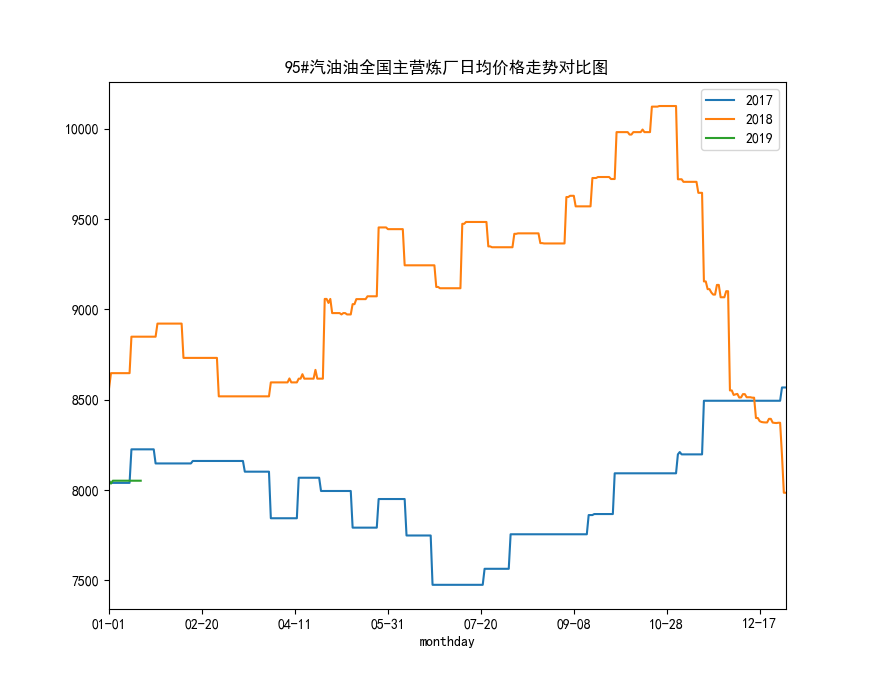

In [350]:

r95 = handle_df(dfz_95_2017, dfz_95_2018, dfz_95_2019)

ax = r95.plot(x='monthday', y='avg(price)_x', label='2017', title='95#汽油油全国主营炼厂日均价格走势对比图')
r95.plot(x='monthday', y='avg(price)_y', label='2018', ax=ax)
r95.plot(x='monthday', y='avg(price)', label='2019', ax=ax)

In [341]:
def get_data_3years(o_type):
    
    connection = pymysql.connect(host = '39.105.9.20',user = 'root',password = 'bigdata_oil',db = 'cxd_data',charset = 'utf8')

    sql_2017 = "SELECT ANY_VALUE(type),date,avg(price) FROM out_price_factory_value v JOIN out_price_factory_key k ON k.id = v.ref_key_id \
    WHERE source_id = '3' AND k.`type` like '{0}' and price > 100 \
    and date >= '2017-01-01' and date < '2018-01-01' group by date order by date".format(o_type)
    sql_2018 = "SELECT ANY_VALUE(type),date,avg(price) FROM out_price_factory_value v JOIN out_price_factory_key k ON k.id = v.ref_key_id \
    WHERE source_id = '3' AND k.`type` like '{0}' and price > 100\
    and date >= '2018-01-01' and date < '2019-01-01' group by date order by date".format(o_type)
    sql_2019 = "SELECT ANY_VALUE(type),date,avg(price) FROM out_price_factory_value v JOIN out_price_factory_key k ON k.id = v.ref_key_id \
    WHERE source_id = '3' AND k.`type` like '{0}' and price > 100 \
    and date >= '2019-01-01' and date < '2020-01-01' group by date order by date".format(o_type)
    df_2017 = pandas.read_sql(sql_2017, connection)
    df_2018 = pandas.read_sql(sql_2018, connection)
    df_2019 = pandas.read_sql(sql_2019, connection)
    
    return df_2017, df_2018, df_2019

dfz_0g6_2017, dfz_0g6_2018, dfz_0g6_2019 = get_data_3years('%0#国六%') #0号国六柴油
dfz_0g5_2017, dfz_0g5_2018, dfz_0g5_2019 = get_data_3years('%0#国五%') #0号国五柴油

dfz_92_2017, dfz_92_2018, dfz_92_2019 = get_data_3years('%92#%') #92号汽油
dfz_95_2017, dfz_95_2018, dfz_95_2019 = get_data_3years('%95#%') #95号汽油


dfz_0g6_2017.head()

ANY_VALUE(type)        date  avg(price)
0          0#国六车柴  2017-09-21      5750.0
1          0#国六车柴  2017-09-22      5800.0
2          0#国六车柴  2017-09-25      5850.0
3            0#国六  2017-09-26      6012.5
4            0#国六  2017-09-27      6077.0

In [342]:
dfz_0g6_2018.head()

ANY_VALUE(type)        date   avg(price)
0            0#国六  2018-01-02  6202.142857
1            0#国六  2018-01-03  6177.857143
2            0#国六  2018-01-04  6220.714286
3            0#国六  2018-01-05  6189.285714
4            0#国六  2018-01-08  6117.857143

In [343]:
len(dfz_0g6_2018)

317

In [218]:
# dfz_0g6_2019['date'].astype(str)
dfz_0g6_2019['monthday'] = dfz_0g6_2019['date'].apply(lambda x:x.strftime('%m-%d'))
# dfz_0g6_2019['date_f'] = dfz_0g6_2019['date'].apply(lambda x: x[-5:])
dfz_0g6_2019.head()

type        date   avg(price) monthday
0  0#国六  2019-11-29  6845.843866    11-29
1  0#国六  2019-11-28  6845.843866    11-28
2  0#国六  2019-11-27  6828.724907    11-27
3  0#国六  2019-11-26  6823.297398    11-26
4  0#国六  2019-11-25  6801.719231    11-25

In [241]:
def handle_df(df1,df2,df3):
    df1['monthday'] = df1['date'].apply(lambda x:x.strftime('%m-%d'))
    df2['monthday'] = df2['date'].apply(lambda x:x.strftime('%m-%d'))
    df3['monthday'] = df3['date'].apply(lambda x:x.strftime('%m-%d'))
    
    df_middle = pandas.merge(df1, df2, how='outer', on='monthday')
    result = pandas.merge(df_middle, df3, how='outer', on='monthday')
    
    result['intday'] = result['monthday'].apply(lambda x:int(x.translate(str.maketrans('', '', '-'))))
    result = result.sort_values('intday', ascending=True)
    return result


In [242]:
r0g6 = handle_df(dfz_0g6_2017, dfz_0g6_2018, dfz_0g6_2019)
r0g6.head()

type_x date_x  avg(price)_x monthday type_y      date_y  avg(price)_y  \
317    NaN    NaN           NaN    01-01    NaN         NaN           NaN   
68     NaN    NaN           NaN    01-02   0#国六  2018-01-02   6202.142857   
69     NaN    NaN           NaN    01-03   0#国六  2018-01-03   6177.857143   
70     NaN    NaN           NaN    01-04   0#国六  2018-01-04   6220.714286   
71     NaN    NaN           NaN    01-05   0#国六  2018-01-05   6189.285714   

     type        date   avg(price)  intday  
317  0#国六  2019-01-01  5638.185185     101  
68   0#国六  2019-01-02  5623.196429     102  
69   0#国六  2019-01-03  5615.800000     103  
70   0#国六  2019-01-04  5640.163636     104  
71   0#国六  2019-01-05  5686.648148     105

<IPython.core.display.Javascript object>


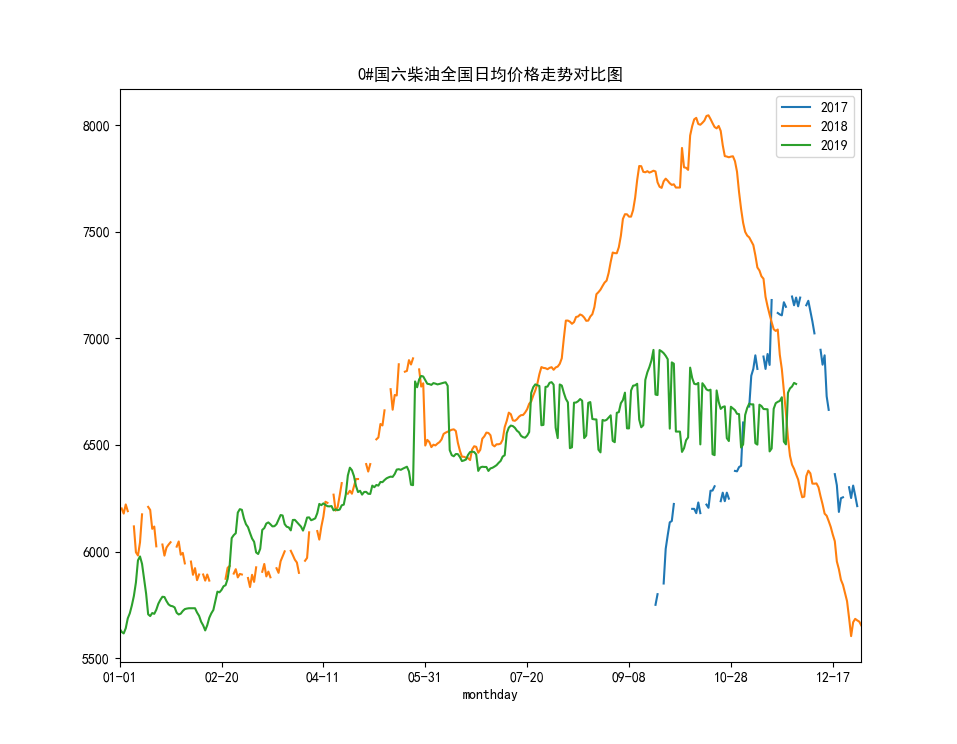

In [247]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

r0g6 = handle_df(dfz_0g6_2017, dfz_0g6_2018, dfz_0g6_2019)

ax = r0g6.plot(x='monthday', y='avg(price)_x', label='2017', title='0#国六柴油全国日均价格走势对比图')
r0g6.plot(x='monthday', y='avg(price)_y', label='2018', ax=ax)
r0g6.plot(x='monthday', y='avg(price)', label='2019', ax=ax)

<IPython.core.display.Javascript object>


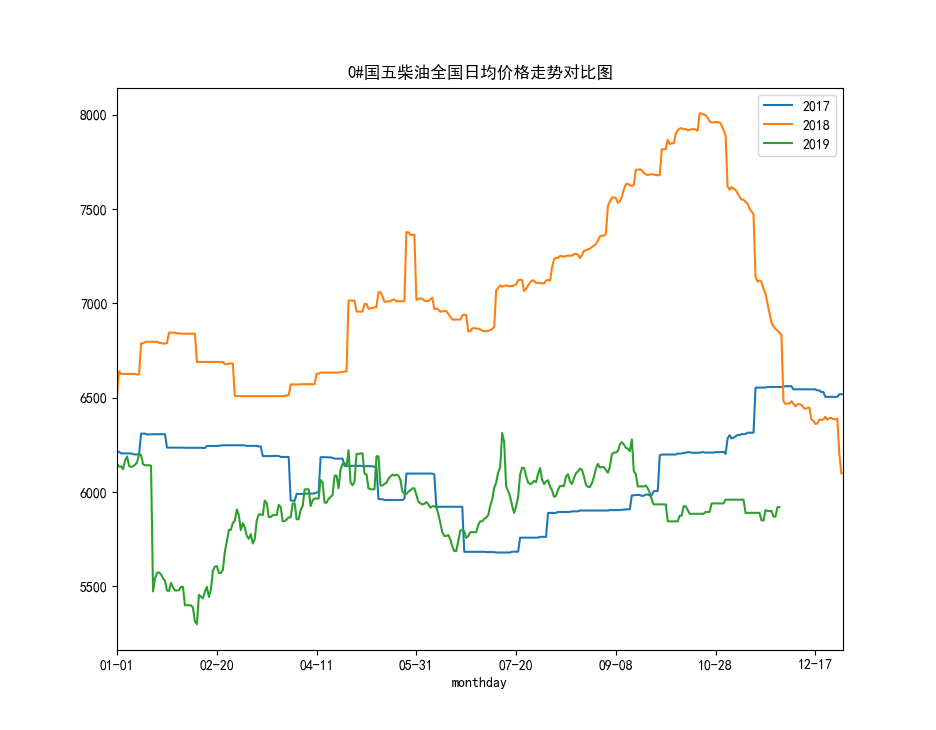

In [248]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

r0g5 = handle_df(dfz_0g5_2017, dfz_0g5_2018, dfz_0g5_2019)

ax = r0g5.plot(x='monthday', y='avg(price)_x', label='2017', title='0#国五柴油全国日均价格走势对比图')
r0g5.plot(x='monthday', y='avg(price)_y', label='2018', ax=ax)
r0g5.plot(x='monthday', y='avg(price)', label='2019', ax=ax)

<IPython.core.display.Javascript object>


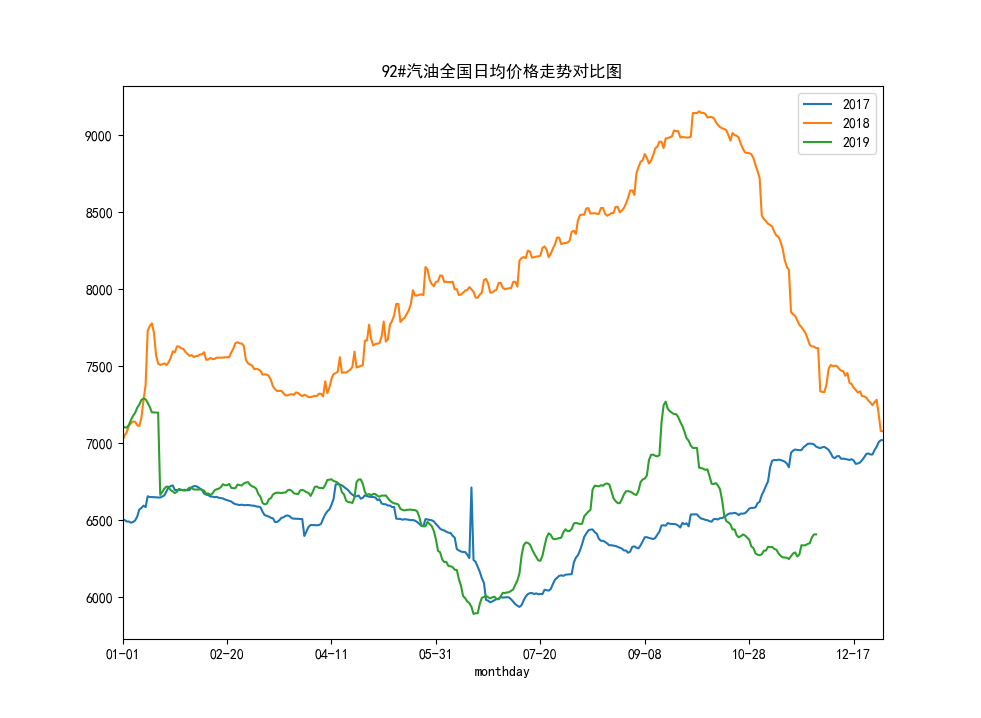

In [249]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

r92 = handle_df(dfz_92_2017, dfz_92_2018, dfz_92_2019)

ax = r92.plot(x='monthday', y='avg(price)_x', label='2017', title='92#汽油全国日均价格走势对比图')
r92.plot(x='monthday', y='avg(price)_y', label='2018', ax=ax)
r92.plot(x='monthday', y='avg(price)', label='2019', ax=ax)

<IPython.core.display.Javascript object>


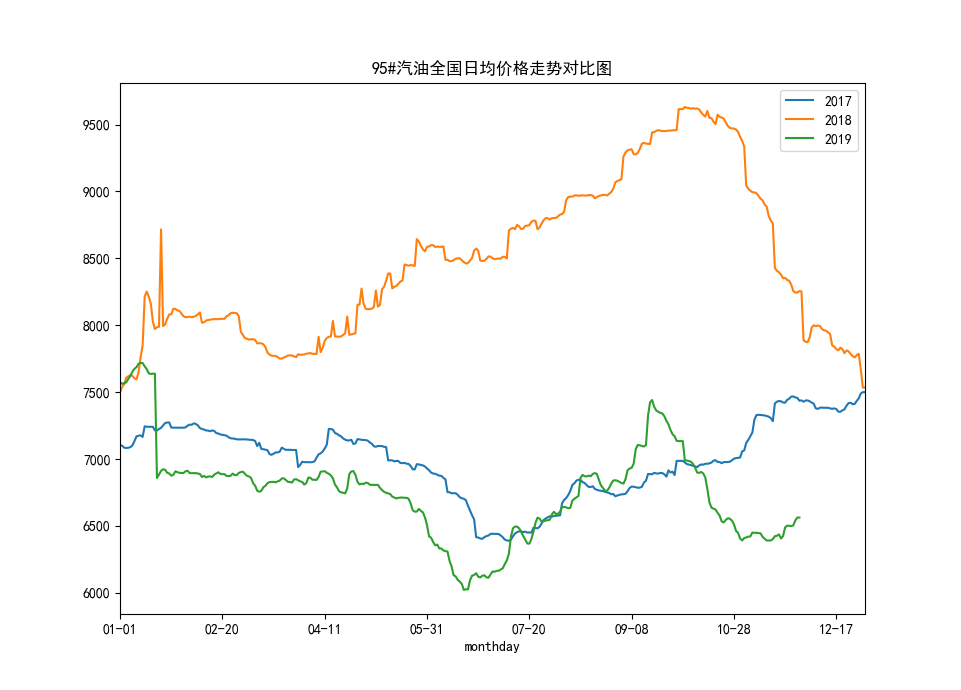

In [250]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

r95 = handle_df(dfz_95_2017, dfz_95_2018, dfz_95_2019)

ax = r95.plot(x='monthday', y='avg(price)_x', label='2017', title='95#汽油全国日均价格走势对比图')
r95.plot(x='monthday', y='avg(price)_y', label='2018', ax=ax)
r95.plot(x='monthday', y='avg(price)', label='2019', ax=ax)

In [256]:
#山东均价
def get_data_3years_sd(o_type):
    
    connection = pymysql.connect(host = '39.105.9.20',user = 'root',password = 'bigdata_oil',db = 'cxd_data',charset = 'utf8')

    sql_2017 = "SELECT type,date,avg(price) FROM out_price_factory_value v JOIN out_price_factory_key k ON k.id = v.ref_key_id \
    WHERE source_id = '3' AND k.`type` like '{0}' and price > 100 and k.province_id=16 \
    and date >= '2017-01-01' and date < '2018-01-01' group by date order by date".format(o_type)
    sql_2018 = "SELECT type,date,avg(price) FROM out_price_factory_value v JOIN out_price_factory_key k ON k.id = v.ref_key_id \
    WHERE source_id = '3' AND k.`type` like '{0}' and price > 100 and k.province_id=16 \
    and date >= '2018-01-01' and date < '2019-01-01' group by date order by date".format(o_type)
    sql_2019 = "SELECT type,date,avg(price) FROM out_price_factory_value v JOIN out_price_factory_key k ON k.id = v.ref_key_id \
    WHERE source_id = '3' AND k.`type` like '{0}' and price > 100 and k.province_id=16 \
    and date >= '2019-01-01' and date < '2020-01-01' group by date order by date".format(o_type)
    df_2017 = pandas.read_sql(sql_2017, connection)
    df_2018 = pandas.read_sql(sql_2018, connection)
    df_2019 = pandas.read_sql(sql_2019, connection)
    
    return df_2017, df_2018, df_2019

dfs_0g6_2017, dfs_0g6_2018, dfs_0g6_2019 = get_data_3years_sd('%0#国六%') #0号国六柴油
dfs_0g5_2017, dfs_0g5_2018, dfs_0g5_2019 = get_data_3years_sd('%0#国五%') #0号国五柴油

dfs_92_2017, dfs_92_2018, dfs_92_2019 = get_data_3years_sd('%92#%') #92号汽油
dfs_95_2017, dfs_95_2018, dfs_95_2019 = get_data_3years_sd('%95#%') #95号汽油


dfs_0g6_2018.head()

type        date   avg(price)
0  0#国六  2018-05-31  6482.451613
1  0#国六  2018-06-01  6512.387097
2  0#国六  2018-06-02  6507.548387
3  0#国六  2018-06-03  6481.214286
4  0#国六  2018-06-04  6484.275862

<IPython.core.display.Javascript object>


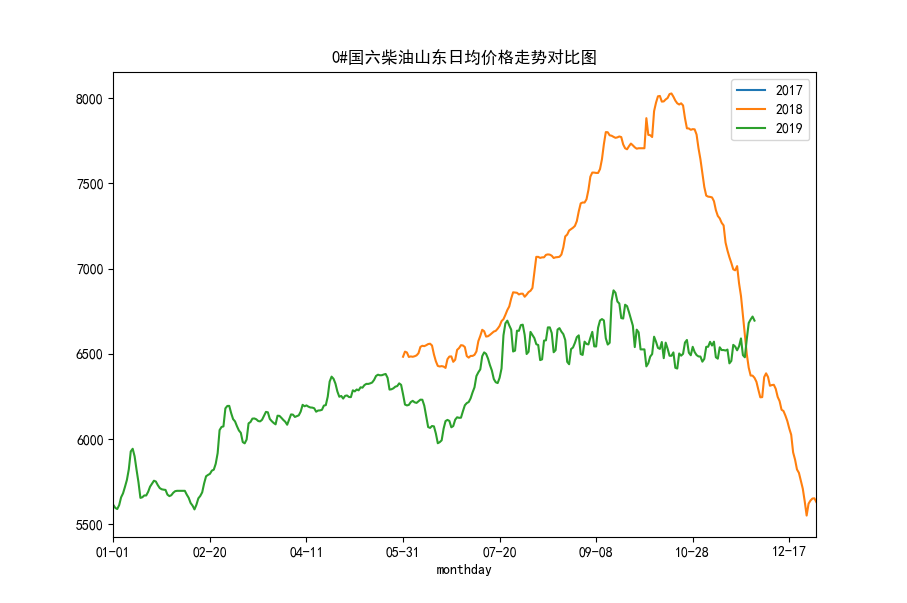

In [257]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

s0g6 = handle_df(dfs_0g6_2017, dfs_0g6_2018, dfs_0g6_2019)

ax = s0g6.plot(x='monthday', y='avg(price)_x', label='2017', title='0#国六柴油山东日均价格走势对比图')
s0g6.plot(x='monthday', y='avg(price)_y', label='2018', ax=ax)
s0g6.plot(x='monthday', y='avg(price)', label='2019', ax=ax)

<IPython.core.display.Javascript object>


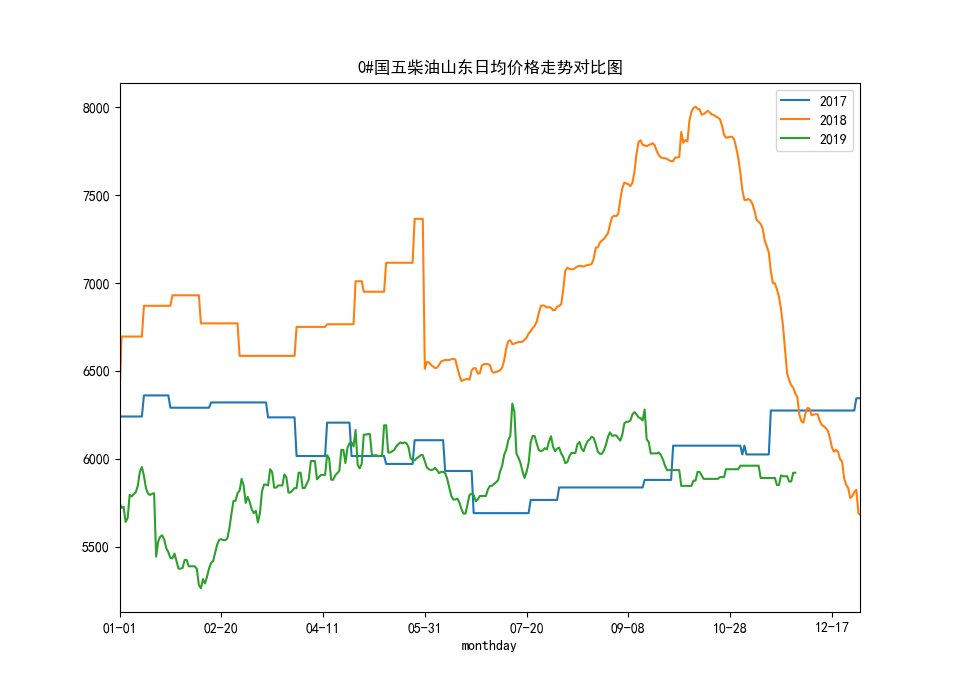

In [258]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

s0g5 = handle_df(dfs_0g5_2017, dfs_0g5_2018, dfs_0g5_2019)

ax = s0g5.plot(x='monthday', y='avg(price)_x', label='2017', title='0#国五柴油山东日均价格走势对比图')
s0g5.plot(x='monthday', y='avg(price)_y', label='2018', ax=ax)
s0g5.plot(x='monthday', y='avg(price)', label='2019', ax=ax)

<IPython.core.display.Javascript object>


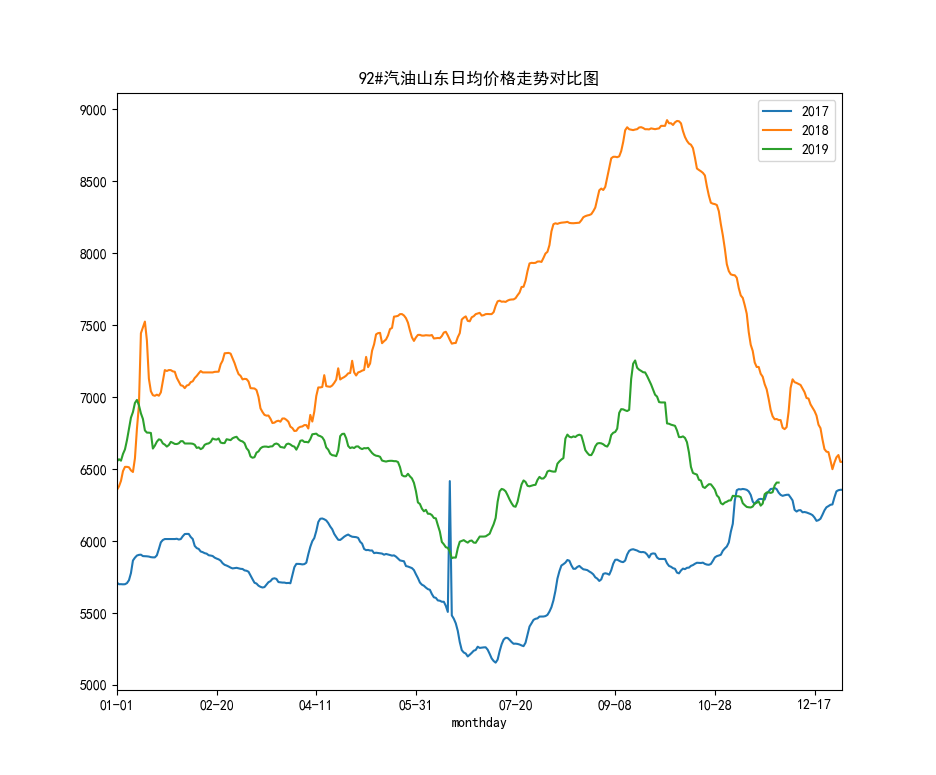

In [259]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

s92 = handle_df(dfs_92_2017, dfs_92_2018, dfs_92_2019)

ax = s92.plot(x='monthday', y='avg(price)_x', label='2017', title='92#汽油山东日均价格走势对比图')
s92.plot(x='monthday', y='avg(price)_y', label='2018', ax=ax)
s92.plot(x='monthday', y='avg(price)', label='2019', ax=ax)

<IPython.core.display.Javascript object>


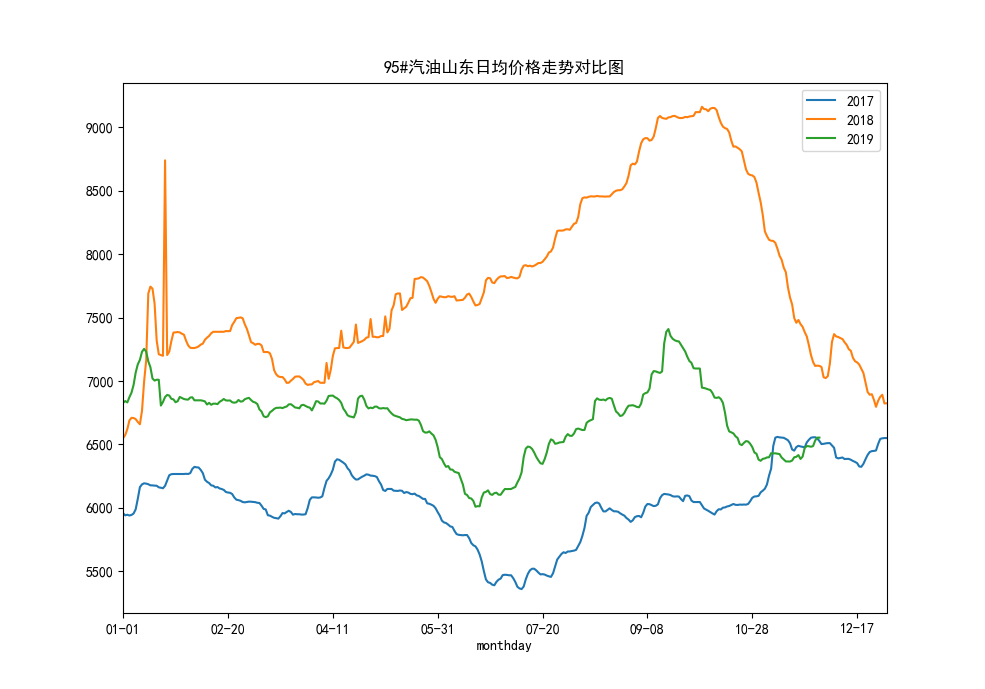

In [260]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

s95 = handle_df(dfs_95_2017, dfs_95_2018, dfs_95_2019)

ax = s95.plot(x='monthday', y='avg(price)_x', label='2017', title='95#汽油山东日均价格走势对比图')
s95.plot(x='monthday', y='avg(price)_y', label='2018', ax=ax)
s95.plot(x='monthday', y='avg(price)', label='2019', ax=ax)

In [262]:
#山东地炼均价
def get_data_3years_sdd(o_type):
    
    connection = pymysql.connect(host = '39.105.9.20',user = 'root',password = 'bigdata_oil',db = 'cxd_data',charset = 'utf8')

    sql_2017 = "SELECT type,date,avg(price) FROM out_price_factory_value v JOIN out_price_factory_key k ON k.id = v.ref_key_id \
    WHERE source_id = '3' AND k.`type` like '{0}' and price > 100 and k.province_id=16 and k.factory_type='地方炼厂' \
    and date >= '2017-01-01' and date < '2018-01-01' group by date order by date".format(o_type)
    sql_2018 = "SELECT type,date,avg(price) FROM out_price_factory_value v JOIN out_price_factory_key k ON k.id = v.ref_key_id \
    WHERE source_id = '3' AND k.`type` like '{0}' and price > 100 and k.province_id=16 and k.factory_type='地方炼厂' \
    and date >= '2018-01-01' and date < '2019-01-01' group by date order by date".format(o_type)
    sql_2019 = "SELECT type,date,avg(price) FROM out_price_factory_value v JOIN out_price_factory_key k ON k.id = v.ref_key_id \
    WHERE source_id = '3' AND k.`type` like '{0}' and price > 100 and k.province_id=16 and k.factory_type='地方炼厂' \
    and date >= '2019-01-01' and date < '2020-01-01' group by date order by date".format(o_type)
    df_2017 = pandas.read_sql(sql_2017, connection)
    df_2018 = pandas.read_sql(sql_2018, connection)
    df_2019 = pandas.read_sql(sql_2019, connection)
    
    return df_2017, df_2018, df_2019

dfsd_0g6_2017, dfsd_0g6_2018, dfsd_0g6_2019 = get_data_3years_sdd('%0#国六%') #0号国六柴油
dfsd_0g5_2017, dfsd_0g5_2018, dfsd_0g5_2019 = get_data_3years_sdd('%0#国五%') #0号国五柴油

dfsd_92_2017, dfsd_92_2018, dfsd_92_2019 = get_data_3years_sdd('%92#%') #92号汽油
dfsd_95_2017, dfsd_95_2018, dfsd_95_2019 = get_data_3years_sdd('%95#%') #95号汽油


dfsd_0g6_2018.head()

type        date   avg(price)
0  0#国六  2018-05-31  6482.451613
1  0#国六  2018-06-01  6512.387097
2  0#国六  2018-06-02  6507.548387
3  0#国六  2018-06-03  6481.214286
4  0#国六  2018-06-04  6484.275862

<IPython.core.display.Javascript object>


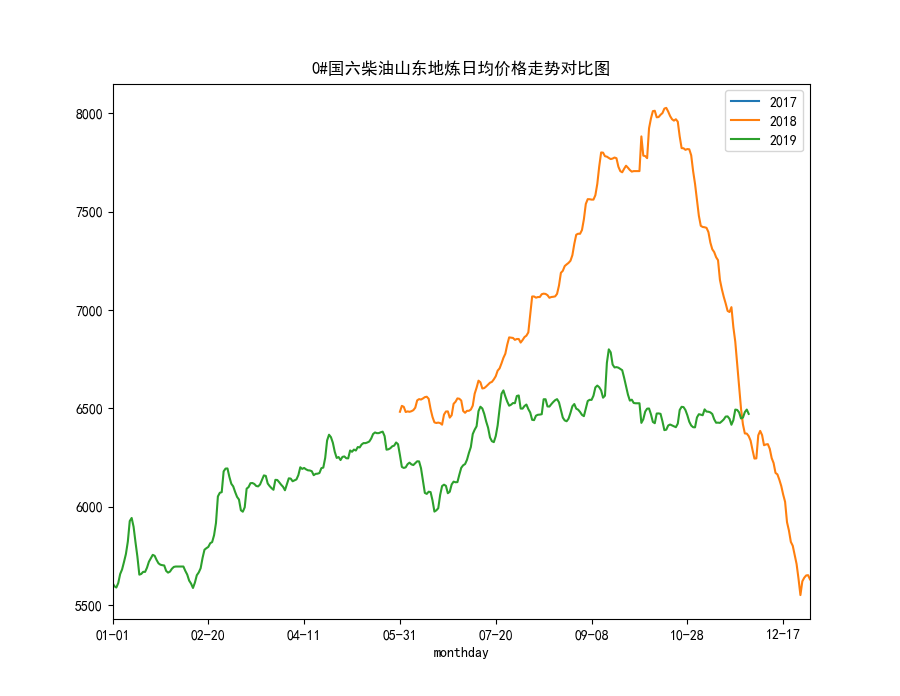

In [263]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

sd0g6 = handle_df(dfsd_0g6_2017, dfsd_0g6_2018, dfsd_0g6_2019)

ax = sd0g6.plot(x='monthday', y='avg(price)_x', label='2017', title='0#国六柴油山东地炼日均价格走势对比图')
sd0g6.plot(x='monthday', y='avg(price)_y', label='2018', ax=ax)
sd0g6.plot(x='monthday', y='avg(price)', label='2019', ax=ax)

<IPython.core.display.Javascript object>


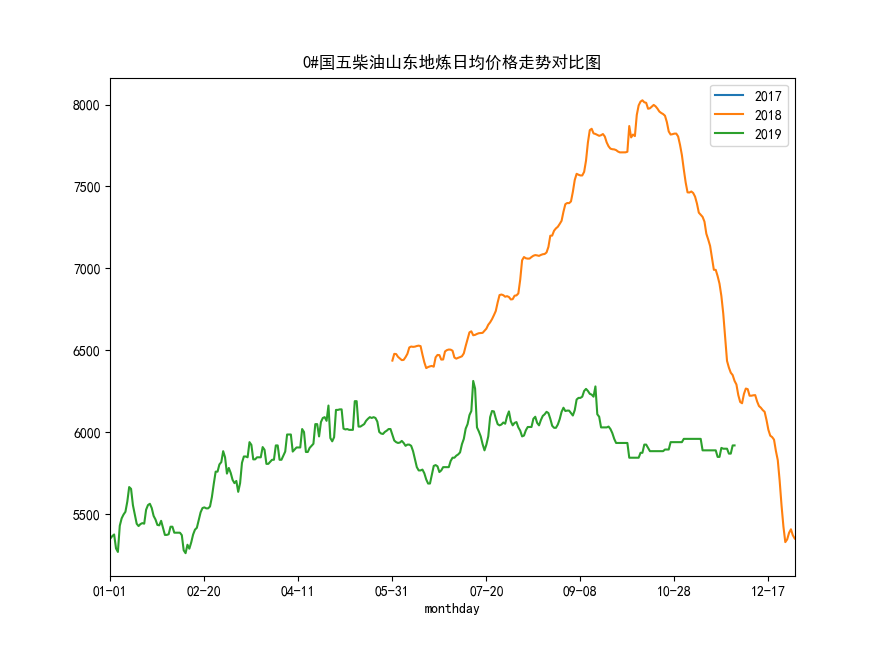

In [265]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

sd0g5 = handle_df(dfsd_0g5_2017, dfsd_0g5_2018, dfsd_0g5_2019)

ax = sd0g5.plot(x='monthday', y='avg(price)_x', label='2017', title='0#国五柴油山东地炼日均价格走势对比图')
sd0g5.plot(x='monthday', y='avg(price)_y', label='2018', ax=ax)
sd0g5.plot(x='monthday', y='avg(price)', label='2019', ax=ax)

<IPython.core.display.Javascript object>


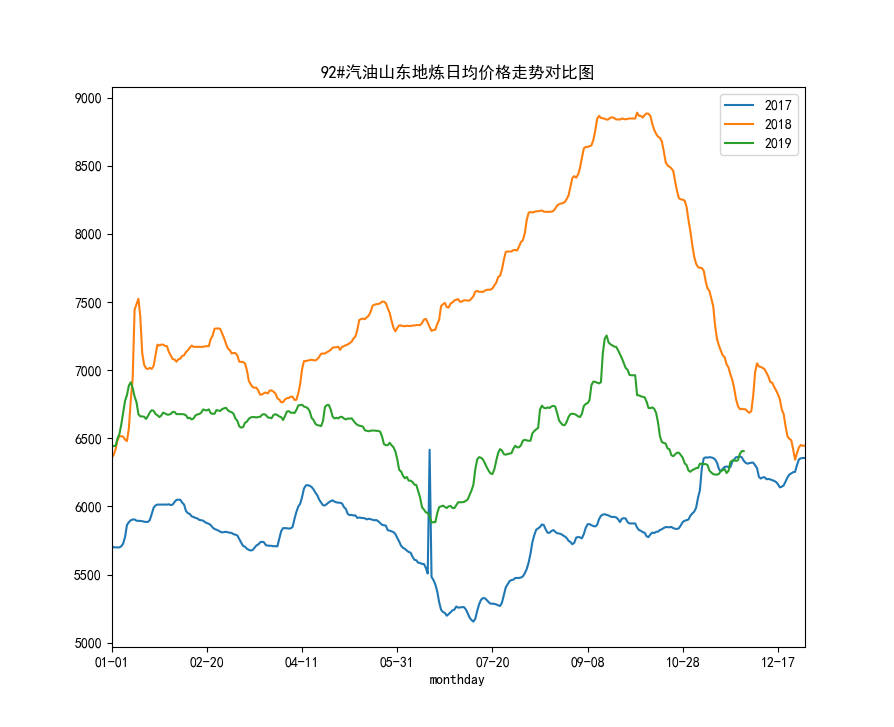

In [266]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

sd92 = handle_df(dfsd_92_2017, dfsd_92_2018, dfsd_92_2019)

ax = sd92.plot(x='monthday', y='avg(price)_x', label='2017', title='92#汽油山东地炼日均价格走势对比图')
sd92.plot(x='monthday', y='avg(price)_y', label='2018', ax=ax)
sd92.plot(x='monthday', y='avg(price)', label='2019', ax=ax)

<IPython.core.display.Javascript object>


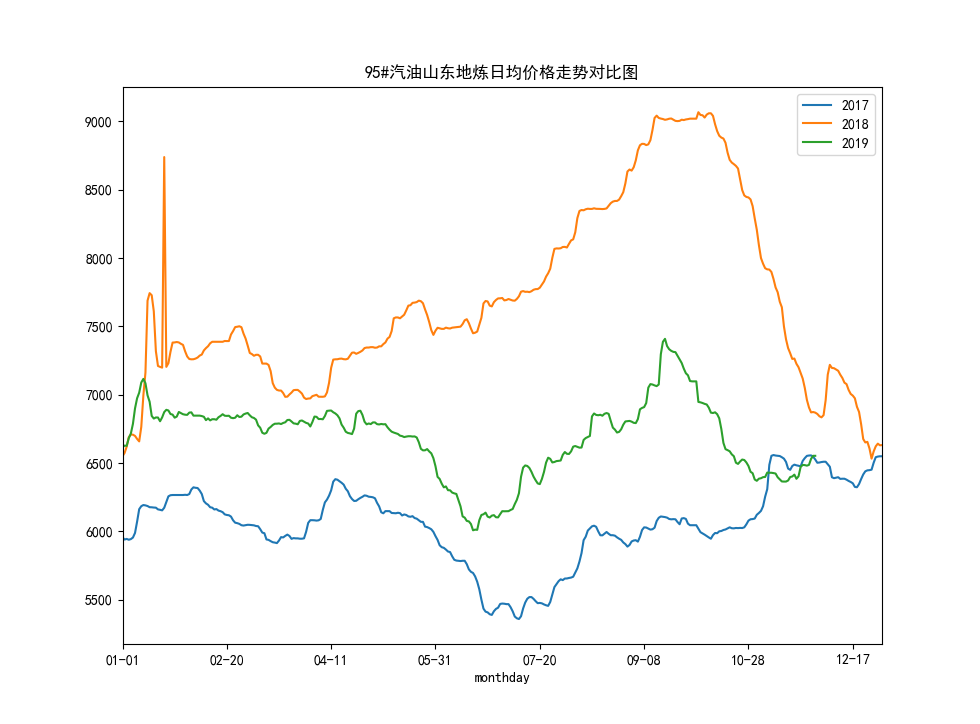

In [267]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

sd95 = handle_df(dfsd_95_2017, dfsd_95_2018, dfsd_95_2019)

ax = sd95.plot(x='monthday', y='avg(price)_x', label='2017', title='95#汽油山东地炼日均价格走势对比图')
sd95.plot(x='monthday', y='avg(price)_y', label='2018', ax=ax)
sd95.plot(x='monthday', y='avg(price)', label='2019', ax=ax)

In [62]:
connection = pymysql.connect(host = '39.105.9.20',user = 'root',password = 'bigdata_oil',db = 'cxd_data',charset = 'utf8')

sql = "SELECT factory, type,date,price FROM out_price_factory_value v JOIN out_price_factory_key k ON k.id = v.ref_key_id \
WHERE source_id = '3' AND k.`name` = '柴油' and price > 100 and date > '2018-04-01' order by date desc"

# with connection.cursor() as coursor:
#     cursor.execute(sql)
# connection.commit()
df = pandas.read_sql(sql, connection)
df.head(20)

factory      type        date   price
0          中海油      0#国六  2019-11-26  6750.0
1          中海油      0#国六  2019-11-26  6900.0
2         鲁清石化  0#国六车用柴油  2019-11-26  6290.0
3         华北石化      0#国六  2019-11-26  6385.0
4   山东富宇化工有限公司   0#国Ⅵ-柴油  2019-11-26  6300.0
5         锦西石化    -10#国六  2019-11-26  6739.0
6          中石化      0#国六  2019-11-26  7160.0
7          中石化    -10#国六  2019-11-26  7560.0
8          中石化      0#国六  2019-11-26  7100.0
9          中石化      0#国六  2019-11-26  6610.0
10         中石化      0#国六  2019-11-26  7050.0
11         中石化      0#国六  2019-11-26  7190.0
12         中石化      0#国六  2019-11-26  7050.0
13         中石化      0#国六  2019-11-26  6760.0
14         中石化      0#国六  2019-11-26  7060.0
15         中石化      0#国六  2019-11-26  6900.0
16         中石油    -10#国六  2019-11-26  7500.0
17         中石油    -10#国六  2019-11-26  7000.0
18        神木富油  轻质化煤焦油1#  2019-11-26  5700.0
19        海科瑞林      0#国六  2019-11-26  6335.0

In [71]:
value_count_df = df['factory'].value_counts()
value_count_df.head(14)

中石化               7075
中石油               7035
京博石化              2048
山东恒源石油化工集团有限公司    1814
尚能                1683
金诚石化              1569
中海油               1539
大港石化              1322
抚顺石化              1320
大连西太              1320
大庆炼化              1320
辽河油田              1320
锦西石化              1320
锦州炼厂              1320
Name: factory, dtype: int64

<IPython.core.display.Javascript object>


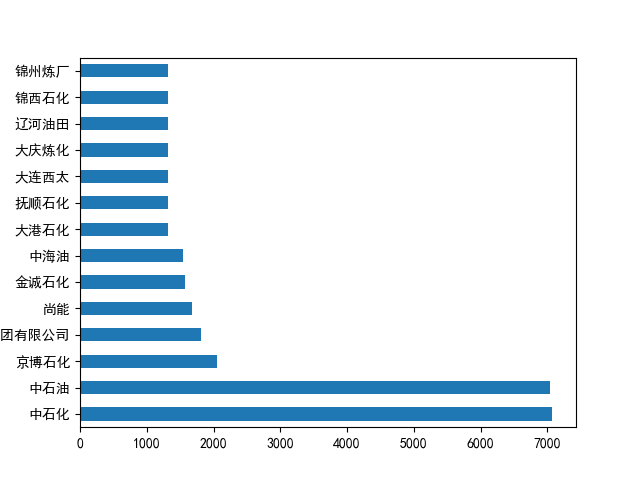

In [64]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

value_count_df.columns = ['name', 'count']
value_count_df[:14].plot(kind='barh',rot=0)

In [19]:
by_name_date = df.groupby(['factory', 'date'])
by_name_date.head()

factory      type        date   price
0                 京博石化    0#国六车柴  2019-11-26  6440.0
1                  亨润德    -10#国六  2019-11-26  6350.0
2                  中石化    -35#国六  2019-11-26  6860.0
3                 广饶正和    0#国六车柴  2019-11-26  6650.0
4                 淄博鑫泰    -35#国六  2019-11-26  6905.0
5                  中石油    -35#国六  2019-11-26  7000.0
6                 吉林石化    -35#国六  2019-11-26  7291.0
7                哈尔滨炼厂    -35#国六  2019-11-26  7256.0
8                榆林炼油厂    -10#国六  2019-11-26  7000.0
9                 大庆炼化    -35#国六  2019-11-26  7256.0
10              河南延长石油      0#国六  2019-11-26  6620.0
11             中海油中捷石化    0#国六车柴  2019-11-26  6500.0
12                联合石化      0#国六  2019-11-26  6420.0
13                 中石油      0#国六  2019-11-26  6695.0
14                 中石油      0#国六  2019-11-26  6800.0
15                 中石油      0#国六  2019-11-26  6850.0
16                 中石油      0#国六  2019-11-26  7200.0
17                 中石化    -10#国六  2019-11-26  6750.0
18                 中石化      0#国六  2019-11-26  7100.0
19                 中石化      0#国六  2019-11-26  7050.0
20                 中石化      0#国六  2019-11-26  6900.0
29                 中海油      0#国六  2019-11-26  6800.0
30                 中海油      0#国六  2019-11-26  6500.0
31                 中海油      0#国六  2019-11-26  6870.0
36                玉皇盛世      加氢催柴  2019-11-26  4100.0
38          山东富宇化工有限公司   0#国Ⅵ-柴油  2019-11-26  6300.0
39                齐成石化        常柴  2019-11-26  6120.0
40                联合石化  -10#国六车柴  2019-11-26  6470.0
41      山东恒源石油化工集团有限公司      None  2019-11-26  6500.0
42              东营华联石化    -10#国六  2019-11-26  6470.0
...                ...       ...         ...     ...
153680            大连石化    -35#国五  2017-01-01  7096.0
153681             新启元      柴油组分  2017-01-01  4800.0
153682            大庆炼化    -35#国五  2017-01-01  6877.0
153683            华北石化    -35#国五  2017-01-01  7096.0
153684            呼市炼化      0#国五  2017-01-01  6060.0
153685            燕山石化      0#国五  2017-01-01  6240.0
153686            辽阳石化    -10#国五  2017-01-01  6508.0
153687           哈尔滨炼厂    -10#国五  2017-01-01  6339.0
153688            大连西太    -35#国五  2017-01-01  7096.0
153689            华锦集团    -35#国五  2017-01-01  6510.0
153690            九江石化      0#国五  2017-01-01  6240.0
153691            锦州炼厂      0#国五  2017-01-01  6140.0
153692            盘锦北沥      -35#  2017-01-01  4806.0
153693            锦西石化    -10#国五  2017-01-01  6508.0
153694            抚顺石化    -10#国五  2017-01-01  6508.0
153695            辽河油田    -10#国五  2017-01-01  6508.0
153696            大庆石化      0#国五  2017-01-01  5980.0
153697            华锦集团    -35#国五  2017-01-01  6510.0
153698            齐鲁石化      0#国三  2017-01-01  5760.0
153699            华北石化    -10#国五  2017-01-01  6540.0
153700            安庆石化      0#国三  2017-01-01  5760.0
153701            扬子石化      0#国三  2017-01-01  5760.0
153702            江苏油田      0#国三  2017-01-01  5760.0
153703            大港石化    -10#国五  2017-01-01  6540.0
153704            胜利油田      0#国五  2017-01-01  6240.0
153705            安庆石化      0#国五  2017-01-01  6240.0
153706            沧州石化      0#国五  2017-01-01  6240.0
153707            锦州炼厂    -10#国五  2017-01-01  6508.0
153708            呼市炼化    -35#国五  2017-01-01  6969.0
153709            华北石化      0#国五  2017-01-01  6170.0

[137973 rows x 4 columns]

In [27]:
# value_count_df.columns = ['name', 'count']
# print(value_count_df.head(5))
count_df = by_name_date.size().unstack().fillna(0)
count_df.head(10)

date         2017-01-01  2017-01-02  2017-01-03  2017-01-04  2017-01-05  \
factory                                                                   
万达天弘                0.0         0.0         0.0         0.0         0.0   
上海石化                2.0         2.0         2.0         2.0         2.0   
上海高桥                2.0         2.0         2.0         2.0         2.0   
东明石化                0.0         0.0         0.0         0.0         0.0   
东营华联石化              0.0         0.0         0.0         0.0         0.0   
东营市胜星化工有限公司         0.0         0.0         0.0         0.0         0.0   
东营齐润化工有限公司          0.0         0.0         0.0         0.0         0.0   
东辰石化                0.0         0.0         0.0         0.0         0.0   
中化集团                0.0         0.0         0.0         0.0         0.0   
中原油田                0.0         0.0         0.0         0.0         0.0   

date         2017-01-06  2017-01-07  2017-01-08  2017-01-09  2017-01-10  \
factory                                                                   
万达天弘                0.0         0.0         0.0         0.0         0.0   
上海石化                2.0         2.0         2.0         2.0         2.0   
上海高桥                2.0         2.0         2.0         2.0         2.0   
东明石化                0.0         0.0         0.0         0.0         0.0   
东营华联石化              0.0         0.0         0.0         0.0         0.0   
东营市胜星化工有限公司         0.0         0.0         0.0         0.0         0.0   
东营齐润化工有限公司          0.0         0.0         0.0         0.0         0.0   
东辰石化                0.0         0.0         0.0         0.0         0.0   
中化集团                0.0         0.0         0.0         0.0         0.0   
中原油田                0.0         0.0         0.0         0.0         0.0   

date            ...      2019-11-17  2019-11-18  2019-11-19  2019-11-20  \
factory         ...                                                       
万达天弘            ...             2.0         2.0         2.0         2.0   
上海石化            ...             0.0         1.0         1.0         1.0   
上海高桥            ...             0.0         1.0         1.0         1.0   
东明石化            ...             2.0         2.0         2.0         2.0   
东营华联石化          ...             3.0         3.0         3.0         3.0   
东营市胜星化工有限公司     ...             1.0         1.0         1.0         1.0   
东营齐润化工有限公司      ...             1.0         1.0         1.0         1.0   
东辰石化            ...             0.0         0.0         0.0         0.0   
中化集团            ...             0.0         5.0         5.0         5.0   
中原油田            ...             0.0         1.0         1.0         1.0   

date         2019-11-21  2019-11-22  2019-11-23  2019-11-24  2019-11-25  \
factory                                                                   
万达天弘                2.0         2.0         2.0         2.0         2.0   
上海石化                1.0         1.0         0.0         0.0         1.0   
上海高桥                1.0         1.0         0.0         0.0         1.0   
东明石化                2.0         2.0         2.0         2.0         2.0   
东营华联石化              3.0         3.0         3.0         3.0         3.0   
东营市胜星化工有限公司         1.0         1.0         1.0         1.0         1.0   
东营齐润化工有限公司          1.0         1.0         1.0         1.0         1.0   
东辰石化                0.0         0.0         0.0         0.0         0.0   
中化集团                5.0         6.0         0.0         0.0         6.0   
中原油田                1.0         1.0         0.0         0.0         1.0   

date         2019-11-26  
factory                  
万达天弘                2.0  
上海石化                1.0  
上海高桥                1.0  
东明石化                2.0  
东营华联石化              3.0  
东营市胜星化工有限公司         1.0  
东营齐润化工有限公司          1.0  
东辰石化                0.0  
中化集团                6.0  
中原油田                1.0  

[10 rows x 1060 columns]

In [28]:
indexer = count_df.sum(1).argsort() #注意是index的升序
indexer

factory
万达天弘                      7
上海石化                     50
上海高桥                    130
东明石化                    152
东营华联石化                  110
东营市胜星化工有限公司             100
东营齐润化工有限公司              146
东辰石化                     12
中化集团                     13
中原油田                      5
中国石油乌鲁木齐石油化工总厂           32
中国石油天然气股份有限公司兰州石化分公司    132
中海外                     138
中海外能源科技股份有限公司            48
中海沥青(滨州)                 37
中海油                      19
中海油中捷石化                 112
中海精化                     11
中石化                      10
中石化沧州炼厂                  61
中石油                      67
乌石化                      35
乌鲁木齐石化                   38
九江石化                    131
云南石化                    117
亚通石化                     69
亨润德                      71
京博石化                      6
克拉玛依石化                   66
兰州石化                     60
                       ... 
神木天元                     28
神木富油                      3
神驰化工                     98
福建联合                     80
福建联合石油化工有限公司

In [32]:
desc_df = indexer.take(indexer)
desc_df.tail(10)

factory
大连石化       9
大连西太      73
哈尔滨炼厂    134
吉林石化      68
抚顺石化      21
辽河油田      41
呼市炼化     135
大港石化     157
中石油       67
中石化       10
dtype: int64

In [66]:
df_count10 = df[(df.factory=='中石油')|(df.factory=='中石化')|(df.factory=='京博石化')|(df.factory=='山东恒源石油化工集团有限公司')\
                |(df.factory=='尚能')|(df.factory=='金诚石化')|(df.factory=='中海油')]
df_count10.head()

factory    type        date   price
0     中海油    0#国六  2019-11-26  6750.0
1     中海油    0#国六  2019-11-26  6900.0
6     中石化    0#国六  2019-11-26  7160.0
7     中石化  -10#国六  2019-11-26  7560.0
8     中石化    0#国六  2019-11-26  7100.0

In [89]:
df_count7 = df[(df.factory=='大港石化')|(df.factory=='抚顺石化')|(df.factory=='京博石化')|(df.factory=='大连西太')\
                |(df.factory=='尚能')|(df.factory=='金诚石化')|(df.factory=='锦州炼厂')]
df_count7.head()

factory    type        date   price
21     抚顺石化  -10#国六  2019-11-26  6739.0
38     抚顺石化  -35#国六  2019-11-26  7313.0
146    金诚石化    0#国六  2019-11-26  6370.0
158    京博石化    0#国六  2019-11-26  6440.0
174    京博石化  -10#国六  2019-11-26  6518.0

In [90]:
df_count7['type'].value_counts()

0#国六        2196
0#国五        1257
-35#国五      1168
-10#国五      1168
-10#国六      1107
常柴           686
0#京六车柴       610
-35#国六       594
0#国六车柴       545
-20#国六       424
0#国五普柴       396
0#国五车柴       201
0#国四         110
-10#国五车柴      65
-10#国五普柴      44
-10#京Ⅵ        11
Name: type, dtype: int64

In [91]:
df_0g6 = df_count7[(df_count7.type=='0#国六')].groupby(by=['factory', 'date'], axis=0).agg('mean').reset_index()
df_0g6

factory        date   price
0       京博石化  2018-05-31  6518.0
1       京博石化  2018-06-01  6545.0
2       京博石化  2018-06-02  6545.0
3       京博石化  2018-06-03  6545.0
4       京博石化  2018-06-04  6545.0
5       京博石化  2018-06-05  6545.0
6       京博石化  2018-06-06  6545.0
7       京博石化  2018-06-07  6545.0
8       京博石化  2018-06-08  6536.0
9       京博石化  2018-06-09  6563.0
10      京博石化  2018-06-10  6563.0
11      京博石化  2018-06-11  6563.0
12      京博石化  2018-06-12  6563.0
13      京博石化  2018-06-13  6563.0
14      京博石化  2018-06-14  6563.0
15      京博石化  2018-06-15  6501.0
16      京博石化  2018-06-16  6435.0
17      京博石化  2018-06-17  6435.0
18      京博石化  2018-06-18  6374.0
19      京博石化  2018-06-19  6374.0
20      京博石化  2018-06-20  6374.0
21      京博石化  2018-06-21  6374.0
22      京博石化  2018-06-22  6374.0
23      京博石化  2018-06-23  6426.0
24      京博石化  2018-06-24  6426.0
25      京博石化  2018-06-25  6426.0
26      京博石化  2018-06-26  6426.0
27      京博石化  2018-06-27  6444.0
28      京博石化  2018-06-28  6488.0
29      京博石化  2018-06-29  6488.0
...      ...         ...     ...
2166    锦州炼厂  2019-10-16  6390.0
2167    锦州炼厂  2019-10-17  6390.0
2168    锦州炼厂  2019-10-18  6390.0
2169    锦州炼厂  2019-10-21  6390.0
2170    锦州炼厂  2019-10-22  6165.0
2171    锦州炼厂  2019-10-23  6165.0
2172    锦州炼厂  2019-10-24  6165.0
2173    锦州炼厂  2019-10-25  6165.0
2174    锦州炼厂  2019-10-28  6165.0
2175    锦州炼厂  2019-10-29  6165.0
2176    锦州炼厂  2019-10-30  6165.0
2177    锦州炼厂  2019-10-31  6165.0
2178    锦州炼厂  2019-11-01  6165.0
2179    锦州炼厂  2019-11-04  6165.0
2180    锦州炼厂  2019-11-05  6290.0
2181    锦州炼厂  2019-11-06  6290.0
2182    锦州炼厂  2019-11-07  6290.0
2183    锦州炼厂  2019-11-08  6290.0
2184    锦州炼厂  2019-11-11  6290.0
2185    锦州炼厂  2019-11-12  6290.0
2186    锦州炼厂  2019-11-13  6290.0
2187    锦州炼厂  2019-11-14  6290.0
2188    锦州炼厂  2019-11-15  6290.0
2189    锦州炼厂  2019-11-18  6290.0
2190    锦州炼厂  2019-11-19  6355.0
2191    锦州炼厂  2019-11-20  6355.0
2192    锦州炼厂  2019-11-21  6355.0
2193    锦州炼厂  2019-11-22  6355.0
2194    锦州炼厂  2019-11-25  6355.0
2195    锦州炼厂  2019-11-26  6355.0

[2196 rows x 3 columns]

In [ ]:
df_0g6.plot()

<IPython.core.display.Javascript object>


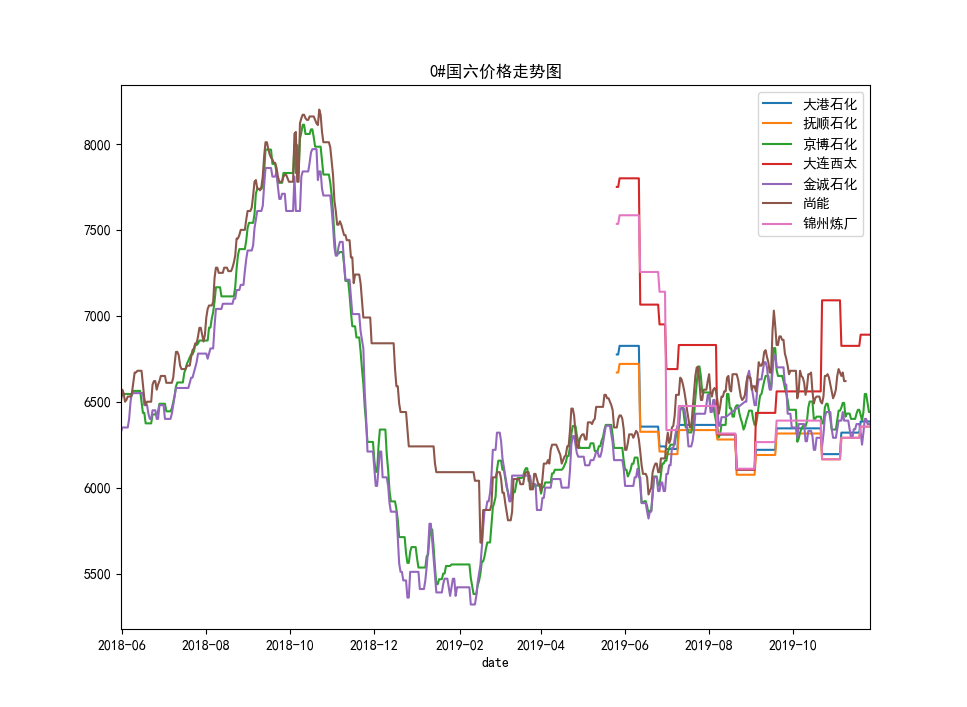

In [93]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

ax = df_0g6[df_0g6['factory'].str.contains('大港石化')].plot(x='date', y='price', label='大港石化', title='0#国六价格走势图')
df_0g6[df_0g6['factory'].str.contains('抚顺石化')].plot(x='date', y='price', label='抚顺石化', ax=ax)
df_0g6[df_0g6['factory'].str.contains('京博石化')].plot(x='date', y='price', label='京博石化', ax=ax)
df_0g6[df_0g6['factory'].str.contains('大连西太')].plot(x='date', y='price', label='大连西太', ax=ax)
df_0g6[df_0g6['factory'].str.contains('金诚石化')].plot(x='date', y='price', label='金诚石化', ax=ax)
df_0g6[df_0g6['factory'].str.contains('尚能')].plot(x='date', y='price', label='尚能', ax=ax)
df_0g6[df_0g6['factory'].str.contains('锦州炼厂')].plot(x='date', y='price', label='锦州炼厂', ax=ax)

<IPython.core.display.Javascript object>


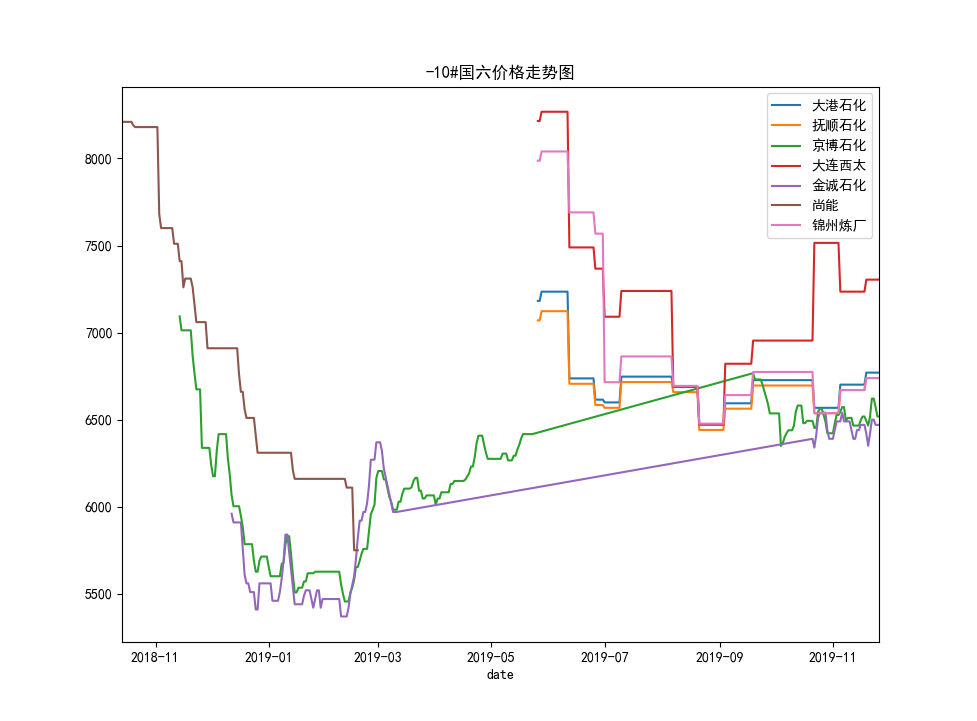

In [95]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

df_10g6 = df_count7[(df_count7.type=='-10#国六')].groupby(by=['factory', 'date'], axis=0).agg('mean').reset_index()


plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

ax = df_10g6[df_10g6['factory'].str.contains('大港石化')].plot(x='date', y='price', label='大港石化', title='-10#国六价格走势图')
df_10g6[df_10g6['factory'].str.contains('抚顺石化')].plot(x='date', y='price', label='抚顺石化', ax=ax)
df_10g6[df_10g6['factory'].str.contains('京博石化')].plot(x='date', y='price', label='京博石化', ax=ax)
df_10g6[df_10g6['factory'].str.contains('大连西太')].plot(x='date', y='price', label='大连西太', ax=ax)
df_10g6[df_10g6['factory'].str.contains('金诚石化')].plot(x='date', y='price', label='金诚石化', ax=ax)
df_10g6[df_10g6['factory'].str.contains('尚能')].plot(x='date', y='price', label='尚能', ax=ax)
df_10g6[df_10g6['factory'].str.contains('锦州炼厂')].plot(x='date', y='price', label='锦州炼厂', ax=ax)

<IPython.core.display.Javascript object>


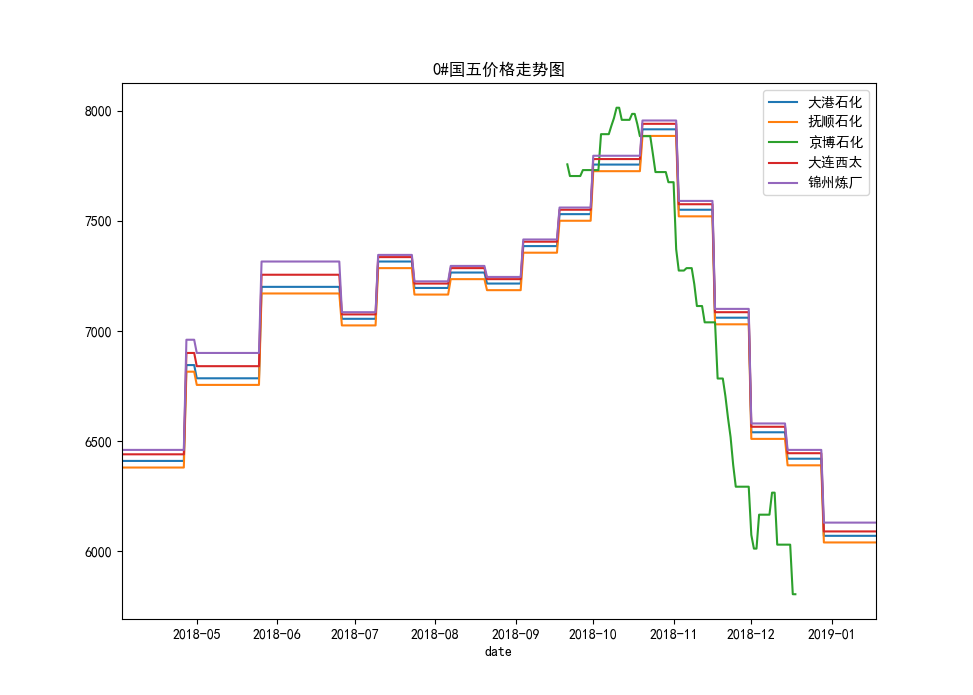

In [98]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

df_0g5 = df_count7[(df_count7.type=='0#国五')].groupby(by=['factory', 'date'], axis=0).agg('mean').reset_index()


plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

ax = df_0g5[df_0g5['factory'].str.contains('大港石化')].plot(x='date', y='price', label='大港石化', title='0#国五价格走势图')
df_0g5[df_0g5['factory'].str.contains('抚顺石化')].plot(x='date', y='price', label='抚顺石化', ax=ax)
df_0g5[df_0g5['factory'].str.contains('京博石化')].plot(x='date', y='price', label='京博石化', ax=ax)
df_0g5[df_0g5['factory'].str.contains('大连西太')].plot(x='date', y='price', label='大连西太', ax=ax)
# df_0g5[df_0g5['factory'].str.contains('金诚石化')].plot(x='date', y='price', label='金诚石化', ax=ax)
# df_0g5[df_0g5['factory'].str.contains('尚能')].plot(x='date', y='price', label='尚能', ax=ax)
df_0g5[df_0g5['factory'].str.contains('锦州炼厂')].plot(x='date', y='price', label='锦州炼厂', ax=ax)

<IPython.core.display.Javascript object>


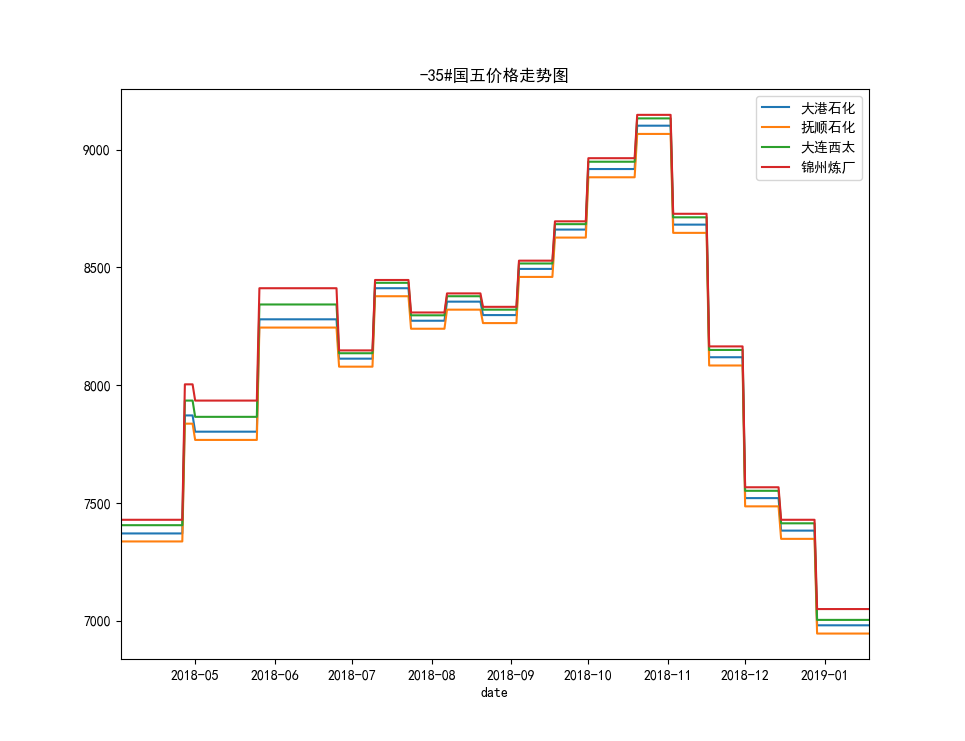

In [102]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

df_35g5 = df_count7[(df_count7.type=='-35#国五')].groupby(by=['factory', 'date'], axis=0).agg('mean').reset_index()


plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

ax = df_35g5[df_35g5['factory'].str.contains('大港石化')].plot(x='date', y='price', label='大港石化', title='-35#国五价格走势图')
df_35g5[df_35g5['factory'].str.contains('抚顺石化')].plot(x='date', y='price', label='抚顺石化', ax=ax)
# df_35g5[df_35g5['factory'].str.contains('京博石化')].plot(x='date', y='price', label='京博石化', ax=ax)
df_35g5[df_35g5['factory'].str.contains('大连西太')].plot(x='date', y='price', label='大连西太', ax=ax)
# df_35g5[df_35g5['factory'].str.contains('金诚石化')].plot(x='date', y='price', label='金诚石化', ax=ax)
# df_35g5[df_35g5['factory'].str.contains('尚能')].plot(x='date', y='price', label='尚能', ax=ax)
df_35g5[df_35g5['factory'].str.contains('锦州炼厂')].plot(x='date', y='price', label='锦州炼厂', ax=ax)

In [48]:
#会计数据相关
connection = pymysql.connect(host = '39.105.9.20',user = 'root',password = 'bigdata_oil',db = 'cxd_data',charset = 'utf8')

sql = "SELECT exchange_date,exchange_good,sum(Je) FROM financial_exchange \
WHERE Je > 100 and exchange_good != '*住宿服务*住宿费' and exchange_date >= '2019-01-01' group by exchange_date order by exchange_date"

# with connection.cursor() as coursor:
#     cursor.execute(sql)
# connection.commit()
df_2019 = pandas.read_sql(sql, connection)
df_2019.head(10)

exchange_date                exchange_good       sum(Je)
0    2019-01-02                 *柴油*车用柴油-35#  2.749920e+08
1    2019-01-03                   *液化气*液化天然气  7.104899e+08
2    2019-01-04                 *柴油*车用柴油-35#  3.054819e+08
3    2019-01-05                       *汽油*汽油  2.755596e+06
4    2019-01-06              *汽油*92#车用汽油(VI)  4.203283e+06
5    2019-01-07             *汽油*95#车用汽油（VIA）  4.681220e+08
6    2019-01-08                    *软件*税控加油机  5.548022e+08
7    2019-01-09  *无机化学原料*工业用氢氧化钠\（离子膜法48%溶液）  1.500817e+09
8    2019-01-10                   *柴油*车用柴油0#  1.878094e+09
9    2019-01-11                     *柴油*车用柴油  6.808356e+08

In [110]:
df['exchange_good'].value_counts()

*柴油*车用柴油-35#                    14
*柴油*普通柴油                        14
*柴油*0号车用柴油(Ⅵ)                   12
*物流辅助服务*仓储费                     12
*柴油*车用柴油（VI）                    11
*运输服务*运费                        10
*柴油*柴油                           9
*有机化学原料*石油混合二甲苯                  9
*有机化学原料*苯                        9
*住宿服务*住宿服务                       7
*有机化学原料*石油苯                      6
*柴油*车用柴油                         6
*住宿服务*房费                         6
*有机化学原料*石油混合二甲苯(PX装置用)           5
*运输服务*国内水路货物运输服务                 5
*有机化学原料*石油混合二甲苯非中石油生产厂           5
*有机化学原料*5℃石油混合二甲苯                5
*柴油*0#车用柴油（VI）                   4
*有机化学原料*石油混合二甲苯 华北石化             4
*柴油*0号车用柴油（VI）                   4
*有机化学原料*混合二甲苯                    4
*有机化学原料*石油混合二甲苯3℃大连石化            3
*柴油*车用柴油（Ⅵ）                      3
*鉴证咨询服务*检验费                      3
*有机化学原料*二甲苯                      3
*有机化学原料*纯苯                       3
*汽油*92号车用汽油（VIA）                 3
*会展服务*会议费                        2
*液化气*液化天然气          

In [329]:
df['sum(Je)'].apply('sum')

267618595723.4492

In [49]:
#会计数据相关
connection = pymysql.connect(host = '39.105.9.20',user = 'root',password = 'bigdata_oil',db = 'cxd_data',charset = 'utf8')

sql = "SELECT exchange_date,exchange_good,sum(Je) FROM financial_exchange \
WHERE Je > 100 and exchange_good != '*住宿服务*住宿费' and exchange_date >= '2018-01-01' and exchange_date < '2019-01-01' \
group by exchange_date order by exchange_date"

# with connection.cursor() as coursor:
#     cursor.execute(sql)
# connection.commit()
df_2018 = pandas.read_sql(sql, connection)
df_2018.head(10)

exchange_date      exchange_good       sum(Je)
0    2018-01-01               0号柴油  1.171750e+09
1    2018-01-02       车用汽油（VIB）92号  2.307488e+07
2    2018-01-03                石油苯  4.671922e+07
3    2018-01-04                  苯  3.275269e+06
4    2018-01-05          车用柴油(Ⅴ)0#  1.073393e+07
5    2018-01-06          *涂料*醇酸稀释剂  9.685430e+03
6    2018-01-07  *石油制品*-10号车用柴油(Ⅵ)  1.483761e+05
7    2018-01-08         *运输服务*运费纯苯  6.659275e+07
8    2018-01-09  *石油制品*-10号车用柴油(Ⅵ)  2.540253e+07
9    2018-01-10  *石油制品*-10号车用柴油(Ⅵ)  7.790724e+07

<IPython.core.display.Javascript object>


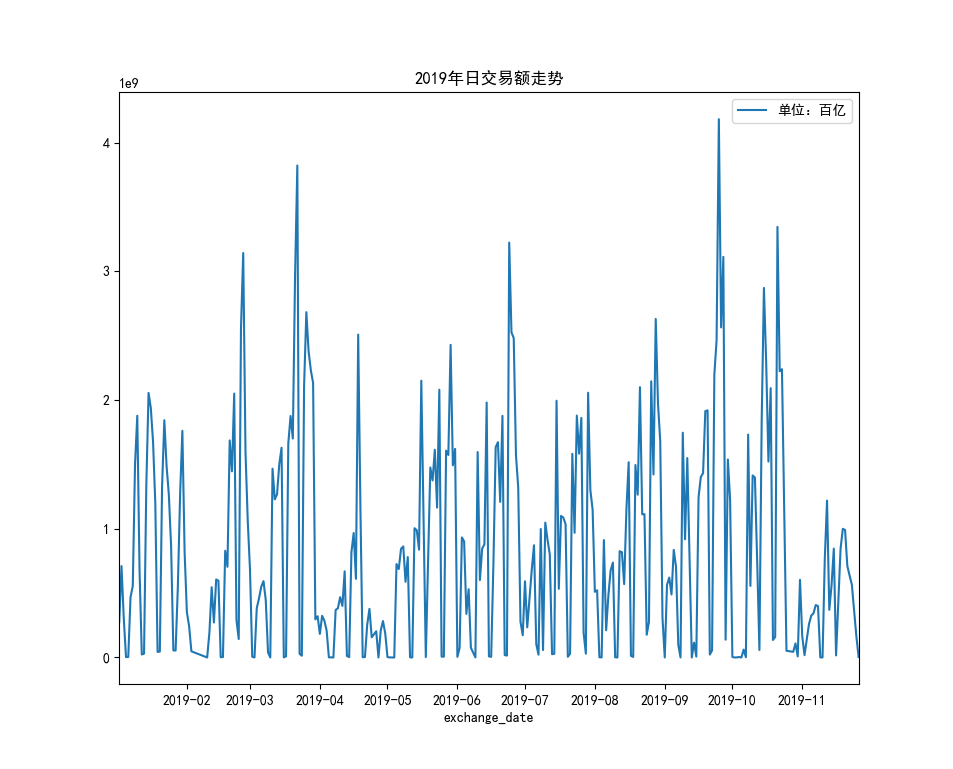

In [177]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

df.plot(x='exchange_date', y='sum(Je)', label='单位：百亿', title='2019年日交易额走势')

In [50]:
def handle_df_sum(df1,df2):
    df1['monthday'] = df1['exchange_date'].apply(lambda x:x.strftime('%m'))
    df2['monthday'] = df2['exchange_date'].apply(lambda x:x.strftime('%m'))
#     df3['monthday'] = df3['exchange_date'].apply(lambda x:x.strftime('%m-%d'))
    
    df_middle = pandas.merge(df1, df2, how='outer', on='monthday')
#     result = pandas.merge(df_middle, df3, how='outer', on='monthday')
    
    df_middle['intday'] = df_middle['monthday'].apply(lambda x:int(x.translate(str.maketrans('', '', '-'))))
    result = df_middle.sort_values('intday', ascending=True)
    r0 = result[['sum(Je)_x','sum(Je)_y','intday']]
    r = r0.groupby(by='intday', axis=0).agg('sum').reset_index()
    return r

r0 = handle_df_sum(df_2018,df_2019)
r0.head()

intday     sum(Je)_x     sum(Je)_y
0       1  7.579579e+11  7.542706e+11
1       2  6.199992e+11  3.491231e+11
2       3  5.244018e+11  1.034666e+12
3       4  4.937293e+11  3.030594e+11
4       5  4.009360e+11  8.098974e+11

In [293]:
x=[str(i) for i in range(1,13)]
x

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

In [60]:
r = r0.groupby(by='intday', axis=0).agg('sum').reset_index()
r['sum(Je)_x'] = r['sum(Je)_x']/10000000000
r['sum(Je)_y'] = r['sum(Je)_y']/10000000000
r.fillna(0,inplace=True)
r

intday  sum(Je)_x   sum(Je)_y
0        1  75.795795   75.427059
1        2  61.999921   34.912311
2        3  52.440181  103.466600
3        4  49.372928   30.305937
4        5  40.093598   80.989737
5        6  41.077592   79.773885
6        7  30.120816   70.637522
7        8  56.699486   74.639883
8        9  63.517180   87.974944
9       10  56.322888   61.357551
10      11  51.839754   26.544403
11      12   0.497213    0.000000

<IPython.core.display.Javascript object>


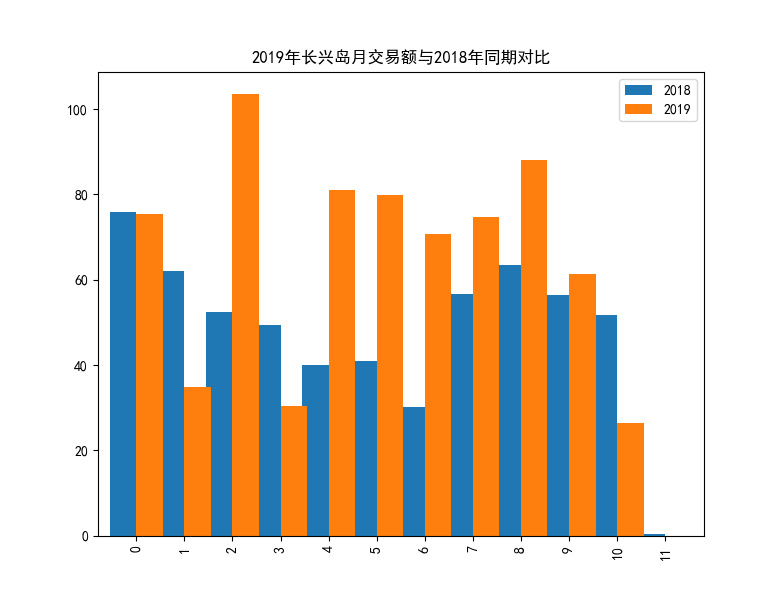

In [64]:
# del r['intday']
r.columns = ['月份','2018','2019']
# r.plot(kind='bar', x=[str(i) for i in range(1,13)], title='2019年月交易额与2018年同期对比')
rbar = r[['2018','2019']]
ax = rbar.plot(kind='bar', width=1.1, title='2019年长兴岛月交易额与2018年同期对比')
# r.plot(kind='line',legend=False, ax=ax)
# r.plot(kind='line',legend=False, ax=ax)

<IPython.core.display.Javascript object>


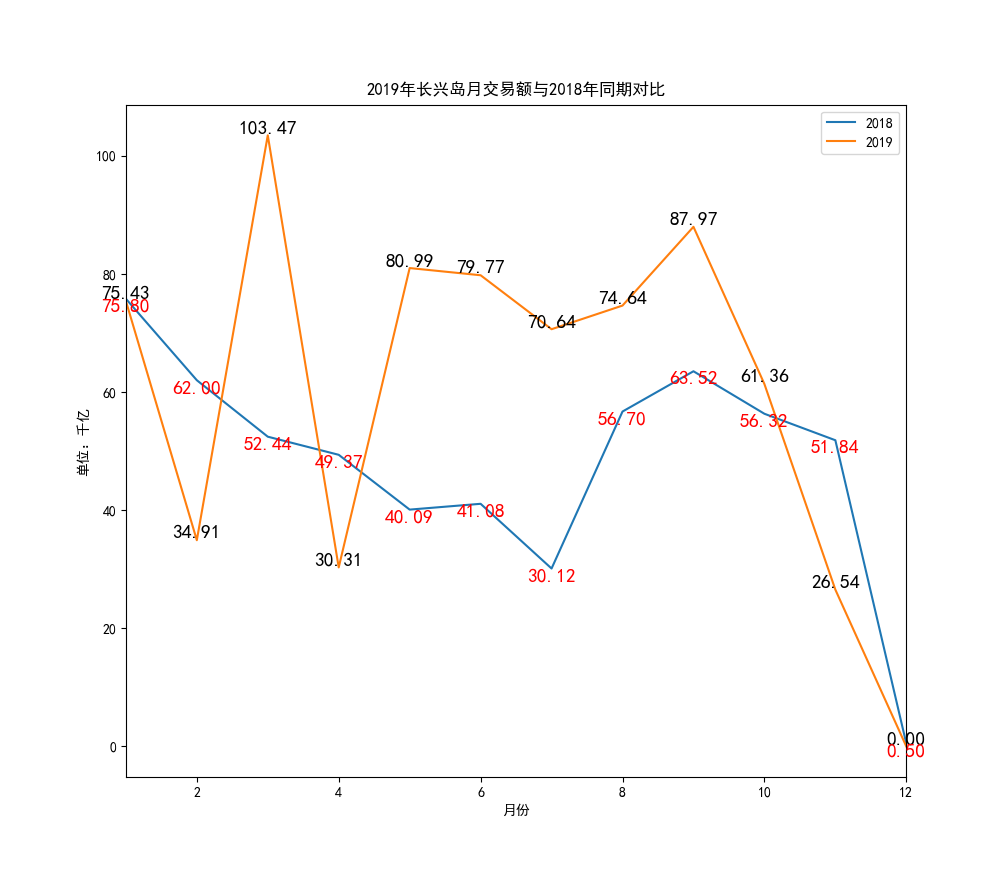

In [68]:

ax = r.plot(kind='line',x='月份',y='2018',label='2018', title='2019年长兴岛月交易额与2018年同期对比')
r.plot(kind='line',x='月份',y='2019',label='2019', ax=ax)
plt.ylabel('单位：千亿')
for a, b in zip(r['月份'],r['2019']):
    ax.text(a, b, '%.2f' % b, ha='center', va='bottom', fontsize=14)
for a, b in zip(r['月份'],r['2018']):
    ax.text(a, b, '%.2f' % b, ha='center', va='top', fontsize=14, color='red')

<IPython.core.display.Javascript object>


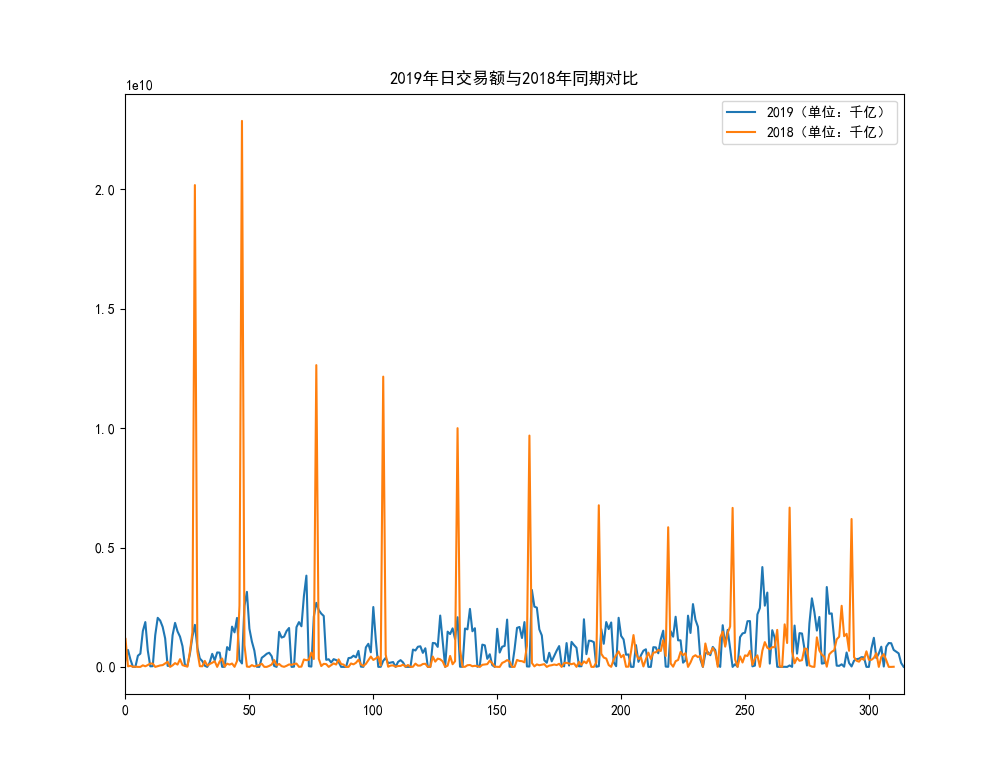

In [178]:
ax = df.plot(y='sum(Je)', label='2019（单位：千亿）', title='2019年日交易额与2018年同期对比')
df_2018.plot(y='sum(Je)',label='2018（单位：千亿）', ax=ax)

In [202]:
connection = pymysql.connect(host = '39.105.9.20',user = 'root',password = 'bigdata_oil',db = 'cxd_data',charset = 'utf8')

sql = "SELECT Gf_company_name,Xf_company_name,exchange_date,exchange_good,sum(Je) FROM financial_exchange \
WHERE Je > 100 and exchange_good != '*住宿服务*住宿费' and exchange_date >= '2019-01-01' group by exchange_good\
 order by sum(Je) desc"

# with connection.cursor() as coursor:
#     cursor.execute(sql)
# connection.commit()
df_goods = pandas.read_sql(sql, connection)
df_goods

Gf_company_name   Xf_company_name exchange_date  \
0              大洼天瑞祥化工有限公司        大连九润石化有限公司    2019-03-27   
1             南京桂花石油化工有限公司  中油新远（大连）石油化工有限公司    2019-01-14   
2            东营万全合石油化工有限公司      申博石化（大连）有限公司    2019-03-22   
3               舟山鑫悦石化有限公司        大连麦芒能源有限公司    2019-03-28   
4         江西赣粤高速公路工程有限责任公司        大连赣中石化有限公司    2019-01-02   
5        贵州浩品建筑工程有限公司务川分公司    中燃黔北石化（大连）有限公司    2019-01-23   
6               上海亚炬资源有限公司      大连秦滨贸易有限责任公司    2019-03-22   
7              嘉兴市吉盛石化有限公司  中油新远（大连）石油化工有限公司    2019-04-16   
8              丹东威尼斯酒店有限公司    大连东源昌盛石油化工有限公司    2019-01-24   
9            青岛裕顺升石油化工有限公司        大连福庆石化有限公司    2019-03-18   
10        贵州鑫前（集团）建设工程有限公司    中燃黔北石化（大连）有限公司    2019-01-23   
11      马鞍山马钢利民商贸有限责任公司加油站  中油新远（大连）石油化工有限公司    2019-01-14   
12             青州市天成化工有限公司  中油晟邦（大连）石油化工有限公司    2019-03-26   
13            大连佰德建筑工程有限公司      大连贝兄石油化工有限公司    2019-01-22   
14              辽宁鑫源沥青有限公司     中油瑞通石化（大）有限公司    2019-03-28   
15        中油中铝（大连）石油化工有限公司    中油玖原（大连）能源有限公司    2019-02-01   
16             浙江汇茂达能源有限公司     福沃德石化（大连）有限公司    2019-01-24   
17        中油中铝（大连）石油化工有限公司    中油玖原（大连）能源有限公司    2019-03-28   
18           新疆鑫运峰国际物流有限公司    中油博凯（大连）石化有限公司    2019-03-20   
19          云南天然橡胶产业集团有限公司      大连中诚石油化工有限公司    2019-01-11   
20    爱辉区罕达气镇德瑞粮食种植农民专业合作社  中油博创（大连）石油化工有限公司    2019-04-03   
21           江西省公路工程有限责任公司        大连赣中石化有限公司    2019-01-16   
22        山东石大科技石化油品销售有限公司      翰源能源（大连）有限公司    2019-01-16   
23          石家庄常青成品油销售有限公司      大连创欣石油化工有限公司    2019-04-15   
24          诚源石油化工（大连）有限公司  中油运达（大连）石油化工有限公司    2019-02-13   
25            贵州天启顺安矿业有限公司      中泰（大连）石化有限公司    2019-01-18   
26              胜星集团有限责任公司    大连华星天晟石油化工有限公司    2019-01-23   
27              北京市房山燕东化工厂    大连金钰恒辉石油化工有限公司    2019-01-14   
28        中东荣信（大连）石油化工有限公司    中油南粤（大连）石化有限公司    2019-01-11   
29        陕西延长石油集团山西销售有限公司      大连鑫川石油化工有限公司    2019-04-10   
...                    ...               ...           ...   
5960            大连绵亘贸易有限公司  大连宝利劼贸易有限公司鞍山分公司    2019-01-27   
5961            大连绵亘贸易有限公司  大连宝利劼贸易有限公司鞍山分公司    2019-01-27   
5962      中油中铝（大连）石油化工有限公司                -1    2019-04-01   
5963      中油中铝（大连）石油化工有限公司                -1    2019-04-01   
5964            大连绵亘贸易有限公司  大连宝利劼贸易有限公司鞍山分公司    2019-01-27   
5965          中丝（大连）石化有限公司   沈阳佳益汽车服务有限公司浑南店    2019-02-01   
5966      中油中铝（大连）石油化工有限公司   中国电信股份有限公司北京分公司    2019-02-25   
5967            大连绵亘贸易有限公司       大连宝利劼贸易有限公司    2019-01-07   
5968       韶关市曲江区鑫瑞丰运输有限公司      大连骏泰石油化工有限公司    2019-07-05   
5969        大商集团鞍山商业投资有限公司        大连绵亘贸易有限公司    2019-04-02   
5970          中丝（大连）石化有限公司   沈阳佳益汽车服务有限公司浑南店    2019-02-01   
5971          中丝（大连）石化有限公司   沈阳佳益汽车服务有限公司浑南店    2019-02-01   
5972            大连绵亘贸易有限公司       大连宝利劼贸易有限公司    2019-01-30   
5973            大连绵亘贸易有限公司       大连宝利劼贸易有限公司    2019-03-26   
5974            大连绵亘贸易有限公司  大连宝利劼贸易有限公司鞍山分公司    2019-01-27   
5975            大连绵亘贸易有限公司       大连宝利劼贸易有限公司    2019-04-12   
5976          大连旅顺供销大厦有限公司        大连绵亘贸易有限公司    2019-03-18   
5977            大连绵亘贸易有限公司      智龙（大连）商贸有限公司    2019-02-22   
5978           大连罗森便利店有限公司        大连绵亘贸易有限公司    2019-04-18   
5979            大连绵亘贸易有限公司       大连宝利劼贸易有限公司    2019-04-12   
5980            大连绵亘贸易有限公司      智龙（大连）商贸有限公司    2019-03-07   
5981            大连绵亘贸易有限公司  大连宝利劼贸易有限公司鞍山分公司    2019-01-27   
5982      中油中铝（大连）石油化工有限公司                -1    2019-04-01   
5983          大连宝禾水务集团有限公司      沈阳京东世纪贸易有限公司    2019-03-15   
5984            大连绵亘贸易有限公司      鞍山万科物业服务有限公司    2019-02-25   
5985          中丝（大连）石化有限公司   沈阳佳益汽车服务有限公司浑南店    2019-02-01   
5986          大连宝禾水务集团有限公司        大连宜家家居有限公司    2019-03-24   
5987            大连绵亘贸易有限公司  大连宝利劼贸易有限公司鞍山分公司    2019-01-27   
5988            大连绵亘贸易有限公司       大连宝利劼贸易有限公司    2019-04-14   
5989            大连绵亘贸易有限公司       大连宝利劼贸易有限公司    2019-04-14   

                                      exchange_good       sum(Je)  
0                                      *航空煤油*3号喷气燃料  1.236437e+10  
1                             

<IPython.core.display.Javascript object>


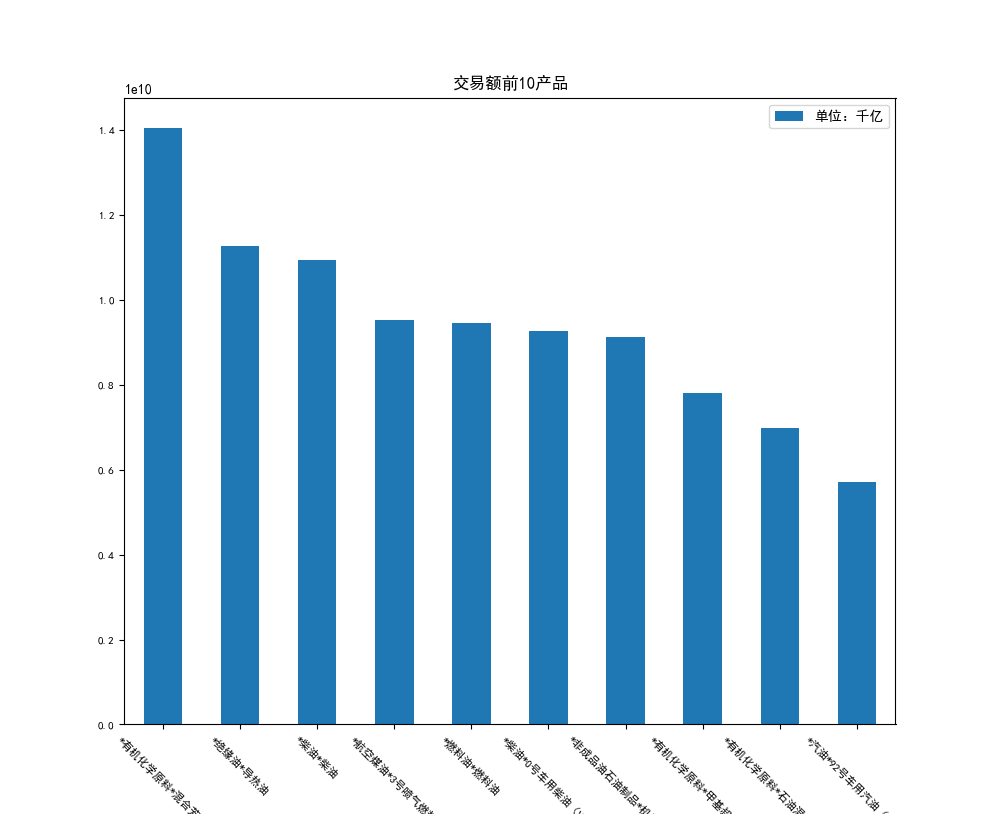

<function print>

In [150]:
df_goods[:10].plot(kind='bar', x='exchange_good', y='sum(Je)', label='单位：千亿',fontsize=8, rot=-45, title='交易额前10产品')
print

0         *有机化学原料*混合芳烃
1             *绝缘油*导热油
2               *柴油*柴油
3         *航空煤油*3号喷气燃料
4             *燃料油*燃料油
5       *柴油*0号车用柴油（VI）
6      *非成品油石油制品*机械加工油
7       *有机化学原料*甲基叔丁基醚
8      *有机化学原料*石油混合二甲苯
9     *汽油*92号车用汽油（VIA）
10      *有色金属冶炼压延品*电解铜
11     *非成品油石油制品*有机热载体
12        *柴油*车用柴油（VI）
13         *有机化学原料*异辛烷
14              *沥青*沥青
15       *燃料油*燃料油（燃料油）
16            *柴油*车用柴油
17         *有机化学原料*二甲苯
18          *有机化学原料*丙烯
19             *柴油*车用油
Name: exchange_good, dtype: object


<IPython.core.display.Javascript object>


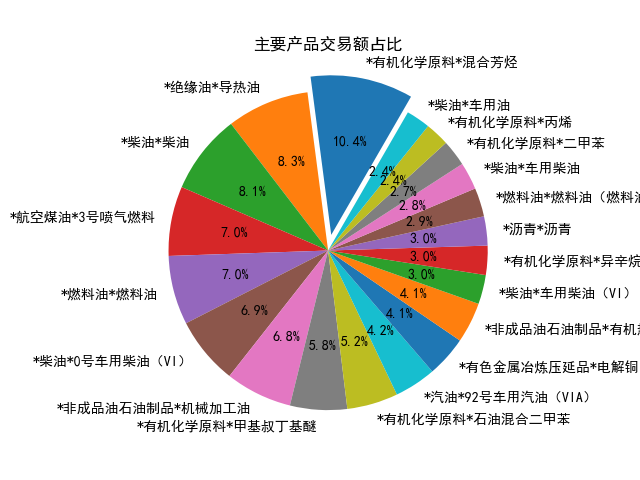

In [179]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

df_pie = df_goods[['exchange_good','sum(Je)']][:20]
print(df_pie['exchange_good'])

explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
plt.pie(labels=df_pie['exchange_good'],
        x=df_pie['sum(Je)'],
        autopct='%.1f%%',
        explode=explode,
        startangle=60)
plt.axis("equal")
plt.title('主要产品交易额占比')
plt.show()

In [6]:
import pymysql
import pandas
import matplotlib.pyplot as plt

connection = pymysql.connect(host = '39.105.9.20',user = 'root',password = 'bigdata_oil',db = 'cxd_data',charset = 'utf8')

sql = "select name, local_date, yes_settlement from yjt_futures_day where local_date > '2018-01-01'and \
yes_settlement > 10"

df_futrues = pandas.read_sql(sql, connection)
df_futrues.head()

name  local_date  yes_settlement
0  原油1903  2019-01-11          422.30
1     WTI  2019-01-11           52.59
2   布伦特原油  2019-01-11           61.68
3  原油1903  2019-01-14          419.70
4     WTI  2019-01-14           51.59

In [317]:
df_futrues['name'].value_counts()

WTI       219
布伦特原油     217
原油连续       77
原油1907     38
原油1904     31
原油1903     29
原油1905      8
原油1908      1
Name: name, dtype: int64

In [320]:
for index in df_futrues.index:
    if '原油1' in df_futrues.loc[index, 'name']:
        df_futrues.loc[index, 'name'] = '原油连续'
    else:
        continue

df_futrues['name'].value_counts()

WTI      219
布伦特原油    217
原油连续     184
Name: name, dtype: int64

In [ ]:
df_futrues[]

In [7]:
df_g = df_futrues.groupby(by=['name', 'local_date'], axis=0).agg('mean').reset_index()
df_g

name  local_date  yes_settlement
0      WTI  2019-01-11           52.59
1      WTI  2019-01-14           51.59
2      WTI  2019-01-15           50.51
3      WTI  2019-01-16           52.11
4      WTI  2019-01-17           52.31
5      WTI  2019-01-18           52.31
6      WTI  2019-01-19           52.07
7      WTI  2019-01-21           53.80
8      WTI  2019-01-22           53.80
9      WTI  2019-01-23           53.80
10     WTI  2019-01-24           53.01
11     WTI  2019-01-25           52.62
12     WTI  2019-01-26           53.13
13     WTI  2019-01-28           53.69
14     WTI  2019-01-29           53.69
15     WTI  2019-01-30           51.99
16     WTI  2019-01-31           53.31
17     WTI  2019-02-01           54.23
18     WTI  2019-02-02           53.79
19     WTI  2019-02-04           55.26
20     WTI  2019-02-05           55.26
21     WTI  2019-02-06           54.56
22     WTI  2019-02-07           53.66
23     WTI  2019-02-08           54.01
24     WTI  2019-02-09           52.64
25     WTI  2019-02-11           52.72
26     WTI  2019-02-12           52.72
27     WTI  2019-02-13           52.41
28     WTI  2019-02-14           53.10
29     WTI  2019-02-15           53.90
..     ...         ...             ...
588  布伦特原油  2019-09-19           63.56
589  布伦特原油  2019-09-20           63.60
590  布伦特原油  2019-09-21           64.40
591  布伦特原油  2019-09-23           64.28
592  布伦特原油  2019-09-24           63.20
593  布伦特原油  2019-09-25           63.73
594  布伦特原油  2019-09-26           62.12
595  布伦特原油  2019-09-27           61.43
596  布伦特原油  2019-09-28           61.74
597  布伦特原油  2019-09-30           61.04
598  布伦特原油  2019-10-01           61.04
599  布伦特原油  2019-10-02           59.25
600  布伦特原油  2019-10-03           58.89
601  布伦特原油  2019-10-04           57.69
602  布伦特原油  2019-10-05           57.71
603  布伦特原油  2019-10-07           58.37
604  布伦特原油  2019-10-08           58.37
605  布伦特原油  2019-10-09           58.35
606  布伦特原油  2019-10-10           58.24
607  布伦特原油  2019-10-11           58.32
608  布伦特原油  2019-10-12           59.10
609  布伦特原油  2019-10-14           60.51
610  布伦特原油  2019-10-15           60.51
611  布伦特原油  2019-10-16           59.35
612  布伦特原油  2019-10-17           58.74
613  布伦特原油  2019-10-18           59.42
614  布伦特原油  2019-10-19           59.91
615  布伦特原油  2019-10-21           59.42
616  布伦特原油  2019-10-22           59.42
617  布伦特原油  2019-10-23           58.96

[618 rows x 3 columns]

<IPython.core.display.Javascript object>


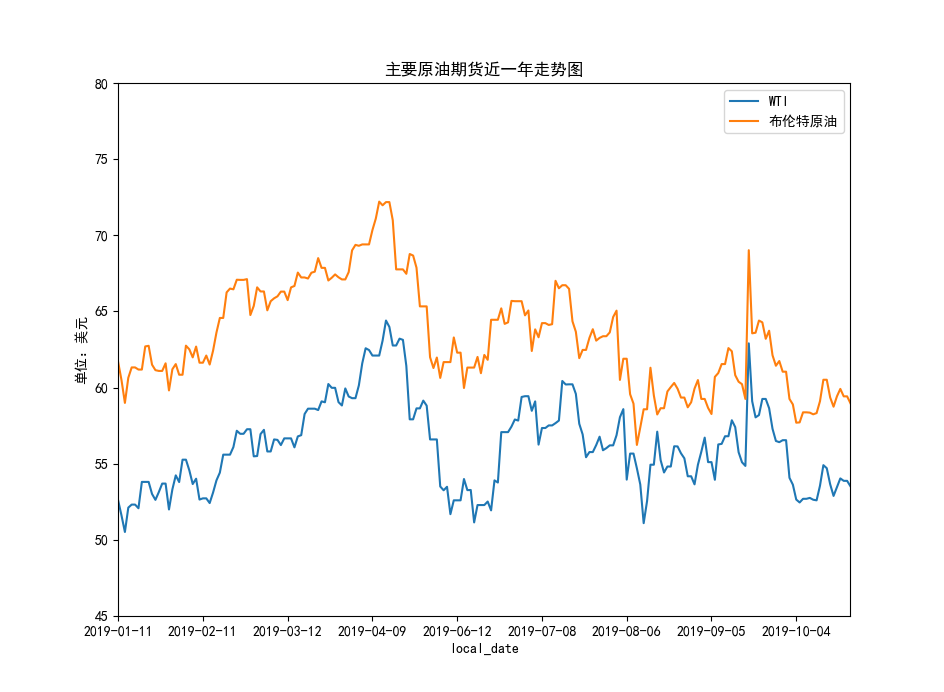

In [14]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

ax = df_g[df_g['name']=='WTI'].plot(x='local_date', y='yes_settlement', ylim=[45,80], label='WTI', title='主要原油期货近一年走势图')
plt.ylabel('单位：美元')
df_g[df_g['name']=='布伦特原油'].plot(x='local_date', y='yes_settlement', label='布伦特原油', ax=ax)
#df_g[df_g['name']=='原油连续'].plot(x='local_date', y='yes_settlement', secondary_y=True, label='原油连续', ax=ax)

In [21]:
connection = pymysql.connect(host = '39.105.9.20',user = 'root',password = 'bigdata_oil',db = 'cxd_data',charset = 'utf8')

sql = "SELECT distinct Gf_company_name FROM financial_exchange \
WHERE exchange_date >= '2019-01-01'"

# sum(distinct Xf_company_name) 
df_1 = pandas.read_sql(sql, connection)
gf_len = len(df_1)

sql = "SELECT distinct Xf_company_name FROM financial_exchange \
WHERE exchange_date >= '2019-01-01'"

df_2 = pandas.read_sql(sql, connection)
xf_len = len(df_2)

print(gf_len + xf_len)

17080


In [22]:
connection = pymysql.connect(host = '39.105.9.20',user = 'root',password = 'bigdata_oil',db = 'cxd_data',charset = 'utf8')

sql = "SELECT distinct Gf_company_name FROM financial_exchange \
WHERE exchange_date >= '2019-01-01'"

# sum(distinct Xf_company_name) 
df_1 = pandas.read_sql(sql, connection)
gf_len = len(df_1)

sql = "SELECT distinct Xf_company_name FROM financial_exchange \
WHERE exchange_date >= '2018-01-01' and exchange_date < '2019-01-01'"

df_2 = pandas.read_sql(sql, connection)
xf_len = len(df_2)

print(gf_len + xf_len)

18299


In [23]:
connection = pymysql.connect(host = '39.105.9.20',user = 'root',password = 'bigdata_oil',db = 'cxd_data',charset = 'utf8')

sql = "SELECT distinct Gf_company_name FROM financial_exchange \
WHERE exchange_date >= '2019-01-01'"

# sum(distinct Xf_company_name) 
df_1 = pandas.read_sql(sql, connection)
gf_len = len(df_1)

sql = "SELECT distinct Xf_company_name FROM financial_exchange \
WHERE exchange_date >= '2017-01-01' and exchange_date < '2018-01-01'"

df_2 = pandas.read_sql(sql, connection)
xf_len = len(df_2)

print(gf_len + xf_len)

17304


In [30]:
connection = pymysql.connect(host = '39.105.9.20',user = 'root',password = 'bigdata_oil',db = 'cxd_data',charset = 'utf8')

sql = "SELECT distinct Gf_company_name FROM financial_exchange \
WHERE exchange_date >= '2019-01-01'"

# sum(distinct Xf_company_name) 
df_1 = pandas.read_sql(sql, connection)
gf_len = len(df_1)

sql = "SELECT distinct Xf_company_name FROM financial_exchange \
WHERE exchange_date >= '2016-01-01' and exchange_date < '2017-01-01'"

df_2 = pandas.read_sql(sql, connection)
xf_len = len(df_2)

print(gf_len + xf_len)

16310


In [32]:
connection = pymysql.connect(host = '39.105.9.20',user = 'root',password = 'bigdata_oil',db = 'cxd_data',charset = 'utf8')

sql = "SELECT distinct Gf_company_name FROM financial_exchange \
WHERE exchange_date >= '2019-01-01'"

# sum(distinct Xf_company_name) 
df_1 = pandas.read_sql(sql, connection)
gf_len = len(df_1)

sql = "SELECT distinct Xf_company_name FROM financial_exchange \
WHERE exchange_date >= '2015-01-01' and exchange_date < '2016-01-01'"

df_2 = pandas.read_sql(sql, connection)
xf_len = len(df_2)

print(gf_len + xf_len)

15348


<IPython.core.display.Javascript object>


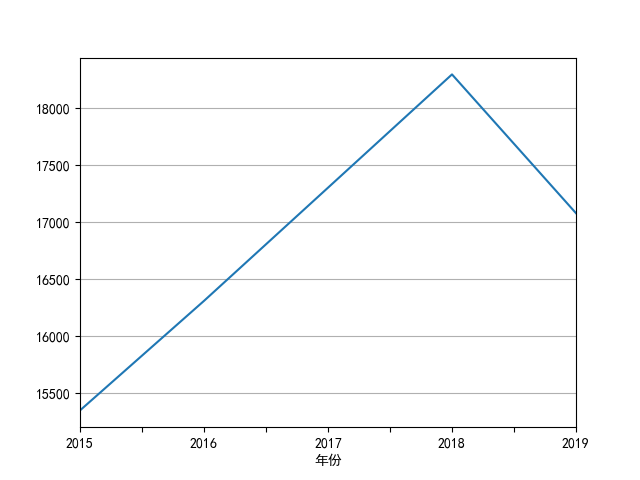

In [47]:
ds2 = [['2015',15348],['2016',16310], ['2017',17304],['2018',18299],['2019',17080]]
df2 = pandas.DataFrame(ds2,columns=['年份','注册企业总数'])
ax = df2.plot(x='年份', y='注册企业总数', title='长兴岛注册交易来往企业数量趋势图')

plt.grid(axis='y')
for a, b in zip(df2['年份'],df2['注册企业总数']):
    ax.text(a, b+0.05, '%.0f' % b, ha='center', va='bottom', fontsize=20)
#plt.text(x=df2['年份'], y=df2['注册企业总数'],s=df2['注册企业总数'])

In [77]:
import pandas
import pymysql

connection = pymysql.connect(host = '39.105.9.20',user = 'root',password = 'bigdata_oil',db = 'cxd_data',charset = 'utf8')

sql = "SELECT exchange_good,exchange_date,Dj FROM financial_exchange \
WHERE exchange_good = '*有机化学原料*混合芳烃' or exchange_good = '*绝缘油*导热油' or exchange_good = '*柴油*柴油'"

df_3goods = pandas.read_sql(sql, connection)
df_3goods.head(10)

exchange_good exchange_date           Dj
0      *绝缘油*导热油    2018-07-19  6120.689655
1      *绝缘油*导热油    2018-07-19  6120.689655
2      *绝缘油*导热油    2018-07-19  6120.689655
3      *绝缘油*导热油    2018-07-19  6120.689655
4      *绝缘油*导热油    2018-07-24  6077.586207
5      *绝缘油*导热油    2018-07-24  6077.586207
6      *绝缘油*导热油    2018-07-24  6077.586207
7      *绝缘油*导热油    2018-07-24  6077.586207
8      *绝缘油*导热油    2018-07-24  6077.586207
9      *绝缘油*导热油    2018-07-24  6077.586207

In [85]:
import datetime

df_2019_3goods = df_3goods[(df_3goods['exchange_date']>=datetime.date(2019, 1, 1))&(df_3goods['Dj']>1000)]
df_2019_3goods['month'] = df_2019_3goods['exchange_date'].apply(lambda x:x.strftime('%m'))
df_2019_3goods.head()

D:\Selvaria\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


exchange_good exchange_date       Dj month
30190  *有机化学原料*混合芳烃    2019-01-11  5086.21    01
30191  *有机化学原料*混合芳烃    2019-01-11  5086.21    01
30192  *有机化学原料*混合芳烃    2019-01-11  5086.21    01
30193  *有机化学原料*混合芳烃    2019-01-11  5086.21    01
30194  *有机化学原料*混合芳烃    2019-01-11  5086.21    01

In [86]:
df_2019_3goods[df_2019_3goods['exchange_good']=='*柴油*柴油']

exchange_good exchange_date           Dj month
30243         *柴油*柴油    2019-01-08  5775.860000    01
30244         *柴油*柴油    2019-01-08  5775.860000    01
30245         *柴油*柴油    2019-02-20  5517.240000    02
30246         *柴油*柴油    2019-02-20  5517.240000    02
30247         *柴油*柴油    2019-02-20  5517.240000    02
31577         *柴油*柴油    2019-03-30  5129.310000    03
31580         *柴油*柴油    2019-03-30  5129.310000    03
31591         *柴油*柴油    2019-01-09  4698.280000    01
31592         *柴油*柴油    2019-01-09  4698.280000    01
31593         *柴油*柴油    2019-01-09  4698.280000    01
31594         *柴油*柴油    2019-01-21  4698.280000    01
31891         *柴油*柴油    2019-01-22  6806.030000    01
31892         *柴油*柴油    2019-01-22  6974.140000    01
31893         *柴油*柴油    2019-01-22  6943.970000    01
31894         *柴油*柴油    2019-01-24  6659.480000    01
31895         *柴油*柴油    2019-01-24  6659.480000    01
31896         *柴油*柴油    2019-03-27  5034.480000    03
32497         *柴油*柴油    2019-01-04  5086.190000    01
32498         *柴油*柴油    2019-01-04  5171.380000    01
32499         *柴油*柴油    2019-01-04  5172.930000    01
32500         *柴油*柴油    2019-01-04  5171.380000    01
32501         *柴油*柴油    2019-01-04  5172.410000    01
32502         *柴油*柴油    2019-01-07  5043.160000    01
32503         *柴油*柴油    2019-01-10  5172.390000    01
32504         *柴油*柴油    2019-01-10  5171.380000    01
32505         *柴油*柴油    2019-01-14  5172.410000    01
32506         *柴油*柴油    2019-01-14  5129.310000    01
32507         *柴油*柴油    2019-01-14  5172.410000    01
32508         *柴油*柴油    2019-01-14  5172.410000    01
32509         *柴油*柴油    2019-01-14  5173.620000    01
...              ...           ...          ...   ...
163647        *柴油*柴油    2019-09-24  5909.692186    09
163648        *柴油*柴油    2019-09-24  5915.173754    09
163664        *柴油*柴油    2019-09-24  5909.692186    09
164104        *柴油*柴油    2019-10-23  5657.532732    10
164105        *柴油*柴油    2019-10-23  5657.557522    10
164139        *柴油*柴油    2019-10-24  5909.692186    10
164140        *柴油*柴油    2019-10-24  5909.692186    10
164141        *柴油*柴油    2019-10-24  5909.692186    10
164142        *柴油*柴油    2019-10-24  5909.692186    10
164144        *柴油*柴油    2019-10-24  5909.846446    10
164145        *柴油*柴油    2019-10-24  5909.692186    10
164146        *柴油*柴油    2019-10-24  5909.980138    10
164147        *柴油*柴油    2019-10-24  5909.892724    10
164148        *柴油*柴油    2019-10-24  5909.692186    10
164149        *柴油*柴油    2019-10-24  5909.692186    10
164150        *柴油*柴油    2019-10-24  5909.692186    10
164151        *柴油*柴油    2019-10-24  5909.692186    10
164152        *柴油*柴油    2019-10-24  5909.692186    10
164153        *柴油*柴油    2019-10-24  5909.692186    10
164154        *柴油*柴油    2019-10-24  5909.692186    10
164155        *柴油*柴油    2019-10-24  5909.692186    10
164156        *柴油*柴油    2019-10-24  5909.692186    10
164158        *柴油*柴油    2019-10-24  5909.692186    10
164159        *柴油*柴油    2019-10-24  5909.692186    10
164160        *柴油*柴油    2019-10-24  5909.985279    10
164161        *柴油*柴油    2019-10-24  5909.604772    10
164163        *柴油*柴油    2019-10-24  6129.008458    10
164183        *柴油*柴油    2019-07-17  5442.477876    07
170175        *柴油*柴油    2019-10-21  5752.212389    10
170176        *柴油*柴油    2019-10-21  5752.212389    10

[10719 rows x 4 columns]

In [87]:
df_2019_3goods.drop(['exchange_date'],axis=1,inplace=True)
df_avg = df_2019_3goods.groupby(by=['exchange_good', 'month'], axis=0).agg('mean').reset_index()
df_avg

D:\Selvaria\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


exchange_good month           Dj
0   *有机化学原料*混合芳烃    01  4896.525038
1   *有机化学原料*混合芳烃    02  4601.647115
2   *有机化学原料*混合芳烃    03  4825.047681
3   *有机化学原料*混合芳烃    04  4644.557825
4   *有机化学原料*混合芳烃    05  4849.058491
5   *有机化学原料*混合芳烃    06  4839.382808
6   *有机化学原料*混合芳烃    07  4757.955109
7   *有机化学原料*混合芳烃    08  4454.912866
8   *有机化学原料*混合芳烃    09  4620.877437
9   *有机化学原料*混合芳烃    10  4803.042843
10  *有机化学原料*混合芳烃    11  4580.584218
11        *柴油*柴油    01  6056.591232
12        *柴油*柴油    02  5770.782763
13        *柴油*柴油    03  5677.939064
14        *柴油*柴油    04  6160.297129
15        *柴油*柴油    05  6074.550689
16        *柴油*柴油    06  5874.312069
17        *柴油*柴油    07  6031.370432
18        *柴油*柴油    08  5618.615873
19        *柴油*柴油    09  5822.640662
20        *柴油*柴油    10  5935.695803
21        *柴油*柴油    11  5906.437758
22      *绝缘油*导热油    01  6367.119591
23      *绝缘油*导热油    02  6388.742394
24      *绝缘油*导热油    03  6229.591275
25      *绝缘油*导热油    04  6395.532675
26      *绝缘油*导热油    05  6352.715350
27      *绝缘油*导热油    06  6345.437453
28      *绝缘油*导热油    07  6337.246370
29      *绝缘油*导热油    08  6234.555415
30      *绝缘油*导热油    09  6158.290481
31      *绝缘油*导热油    10  6116.599241

In [164]:
df_avg.to_excel('d:/单价月平均.xls')

<IPython.core.display.Javascript object>


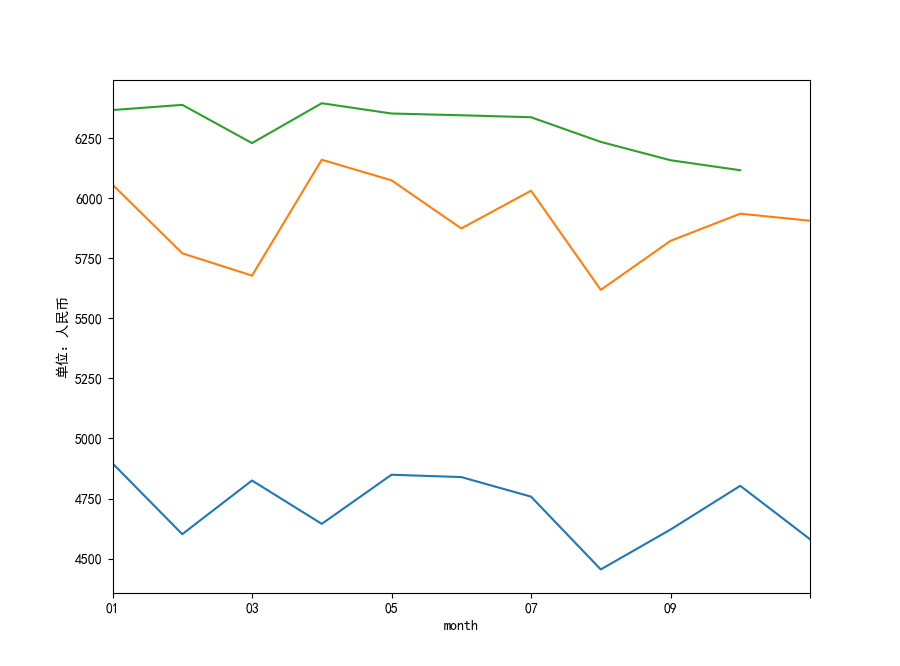

In [163]:
import matplotlib.pyplot as plt

%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

ax = df_avg[df_avg['exchange_good']=='*有机化学原料*混合芳烃'].plot(x='month', y='Dj', label='混合芳烃', title='2019全年销售额前三产品月平均价走势图')
for a, b in zip(df_avg['month'],df_avg['Dj']):
    ax.text(a, b, '%.1f' % b, ha='center', va='bottom', fontsize=10)
plt.ylabel('单位：人民币')
df_avg[df_avg['exchange_good']=='*柴油*柴油'].plot(x='month', y='Dj', label='柴油', ax=ax)
df_avg[df_avg['exchange_good']=='*绝缘油*导热油'].plot(x='month', y='Dj', label='导热油', ax=ax)

In [93]:
import pandas
import pymysql

connection = pymysql.connect(host = '39.105.9.20',user = 'root',password = 'bigdata_oil',db = 'cxd_data',charset = 'utf8')

sql = "SELECT count(Gf_company_name) as count, exchange_good,exchange_date,Dj,Je FROM financial_exchange \
WHERE exchange_date > '2018-12-31' group by exchange_date order by exchange_date"

df_count = pandas.read_sql(sql, connection)
df_count.head(10)

count                exchange_good exchange_date           Dj         Je
0      2                    *住宿服务*住宿费    2019-01-01     0.000000    6509.47
1    818                 *柴油*车用柴油-35#    2019-01-02          NaN   45207.21
2   1981                   *液化气*液化天然气    2019-01-03          NaN   15272.73
3    961                 *柴油*车用柴油-35#    2019-01-04          NaN   69332.24
4    136                    *住宿服务*住宿费    2019-01-05   469.811321     939.62
5    376              *汽油*92#车用汽油(VI)    2019-01-06     4.931034   73110.34
6   1744             *汽油*95#车用汽油（VIA）    2019-01-07          NaN  678983.00
7   2609                    *软件*税控加油机    2019-01-08          NaN   37637.93
8   4357  *无机化学原料*工业用氢氧化钠\（离子膜法48%溶液）    2019-01-09          NaN   11676.72
9   4723                   *柴油*车用柴油0#    2019-01-10  6105.200000   83152.80

In [95]:
df_count['month'] = df_count['exchange_date'].apply(lambda x:x.strftime('%m'))
df_m_count = df_count.groupby(by='month', axis=0).agg('sum').reset_index()
df_m_count

month   count             Dj           Je
0     01   90477   21780.591321   6687159.37
1     02   65922   33560.911603   4768240.73
2     03  135906    7353.647826   3788238.72
3     04   46134   40890.124255    377368.66
4     05  114701   63734.021648   4701661.95
5     06  118614  193768.178058  19714190.15
6     07  117740  127887.538227   6515155.63
7     08  128997  107668.899684  18010356.69
8     09  148644   76821.729598  18094872.97
9     10  156411  132535.533309  17173926.58
10    11   60380   26330.640851   5732108.56

In [165]:
df_m_count['count'].sum()

1183926

<IPython.core.display.Javascript object>


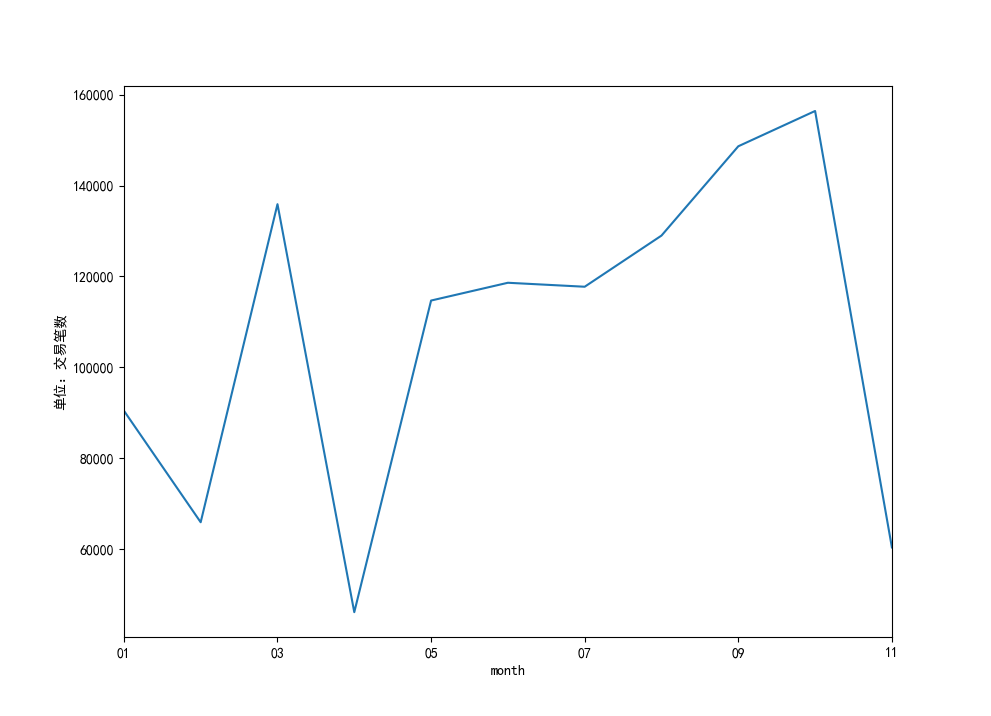

In [162]:
import matplotlib.pyplot as plt

%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

ax = df_m_count.plot(x='month', y='count', legend=False, title='2019全年月度交易笔数走势图')
plt.ylabel('单位：交易笔数')
for a, b in zip(df_m_count['month'],df_m_count['count']):
    ax.text(a, b, '%.0f' % b, ha='center', va='bottom', fontsize=10)
plt.show()

In [140]:
import codecs
# f= codecs.open(r"C:\Users\PC\Desktop/在线支付订单列表2019-12-05.xls",errors='ignore')
f = open(r"D:/Selvaria/scripts/company/changxing_invoice/在线支付订单列表2019-12-05.csv", encoding='utf8')
df_online = pandas.read_csv(f)
df_online.head()

序列                订单编号      订单来源                     打款时间  \
0  4290  201911221305232229  \t上游打款\t  \t2019-11-22 13:05:23\t   
1  4288  201911221100212575  \t上游打款\t  \t2019-11-22 11:00:21\t   
2  4287  201911211158086281  \t上游打款\t  \t2019-11-21 11:58:08\t   
3  4286  201911191620433292  \t上游打款\t  \t2019-11-19 16:20:43\t   
4  4285  201911191048404332  \t上游打款\t  \t2019-11-19 10:48:40\t   

                   付款企业          付款者        支付方式             打款总金额   是否含税  \
0  \t中海博联石油化工(大连)有限公司\t  18920935669  \t工行异步支付\t    \t442,200.00\t  \t是\t   
1    \t麒元佰成石化(大连)有限公司\t  13845947799  \t工行异步支付\t    \t100,000.00\t  \t是\t   
2    \t麒元佰成石化(大连)有限公司\t  13845947799  \t工行异步支付\t  \t2,025,000.00\t  \t是\t   
3    \t麒元佰成石化(大连)有限公司\t  13845947799  \t工行异步支付\t  \t8,800,000.00\t  \t是\t   
4  \t中海博联石油化工(大连)有限公司\t  18920935669  \t工行异步支付\t    \t873,680.00\t  \t是\t   

           产品名称          产品单价                   支付完成时间   采购数量  \
0  \t国六-20#柴油\t  \t6,600.00\t  \t2019-11-22 13:14:23\t   67.0   
1    \t国六0#普柴\t  \t6,000.00\t  \t2019-11-22 11:04:08\t   16.5   
2    \t国六0#普柴\t  \t5,750.00\t  \t2019-11-21 12:01:08\t  350.0   
3    \t国六0#普柴\t  \t5,800.00\t  \t2019-11-19 16:24:11\t  150.0   
4  \t国六-20#柴油\t  \t6,520.00\t  \t2019-11-19 10:58:40\t  134.0   

                 收款企业名称        开户银行                       开户支行  \
0      \t山东金诚重油化工有限公司\t  \t中国工商银行\t  \t中国工商银行股份有限公司桓台支行马桥分理处\t   
1  \t同江市通港加油站（普通合伙企业）\t  \t中国工商银行\t      \t中国工商银行股份有限公司同江市支行\t   
2    \t麒元佰成石化（大连）有限公司\t  \t中国建设银行\t         \t中国建设银行大连市分行营业部\t   
3    \t中油合益石化（大连）有限公司\t  \t中国建设银行\t         \t中国建设银行大连市分行营业部\t   
4      \t山东金诚重油化工有限公司\t  \t中国工商银行\t  \t中国工商银行股份有限公司桓台支行马桥分理处\t   

                   社会信用代码                      收款账号  
0  \t91370321757482363X\t   \t1603007119201007225\t  
1  \t91230881MA18YJ5PX7\t   \t0904022809248121644\t  
2  \t912102443115904311\t  \t21201501400053048280\t  
3  \t91210244MA0XMR3D6D\t  \t21250117006000001451\t  
4  \t91370321757482363X\t   \t1603007119201007225\t

In [156]:
df_online_need = df_online[['付款者','打款总金额','产品名称','支付完成时间']]
df_online_need['打款总金额'] = df_online_need['打款总金额'].apply(lambda x:x.strip("\t").replace(',',''))
df_online_need['产品名称'] = df_online_need['产品名称'].apply(lambda x:x.strip("\t"))
df_online_need['支付完成时间'] = df_online_need['支付完成时间'].apply(lambda x:x.strip("\t"))
df_online_need['月份'] = df_online_need['支付完成时间'].apply(lambda x:int(x[5:7]))
df_online_need

D:\Selvaria\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Selvaria\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Selvaria\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

付款者        打款总金额         产品名称               支付完成时间  月份
0     18920935669    442200.00     国六-20#柴油  2019-11-22 13:14:23  11
1     13845947799    100000.00       国六0#普柴  2019-11-22 11:04:08  11
2     13845947799   2025000.00       国六0#普柴  2019-11-21 12:01:08  11
3     13845947799   8800000.00       国六0#普柴  2019-11-19 16:24:11  11
4     18920935669    873680.00     国六-20#柴油  2019-11-19 10:58:40  11
5     17732566233     77880.00       国六0#普柴  2019-11-15 12:21:16  11
6     18920935669    800000.00       国六0#柴油  2019-11-15 10:48:33  11
7     18920935669   1129000.00       国六0#柴油  2019-11-13 14:15:26  11
8     13845947799    683500.40       国六0#普柴  2019-11-12 16:19:50  11
9     18920935669   1860000.00       国六0#柴油  2019-11-12 09:44:08  11
10    19945820755    200000.00           甲醇  2019-11-11 12:10:46  11
11    18920935669     27000.00       国六0#柴油  2019-11-09 13:33:20  11
12    18920935669    500000.00       国六0#柴油  2019-11-09 13:34:03  11
13    18920935669    500000.00       国六0#柴油  2019-11-09 13:34:41  11
14    13898469601   1890000.00       国六0#普柴  2019-11-08 15:30:37  11
15    13898469601    232980.00     国六-35#柴油  2019-11-08 13:12:53  11
16    18920935669    200000.00       国六0#柴油  2019-11-07 10:09:13  11
17    13845947799    195000.00       国六0#普柴  2019-11-06 13:57:24  11
18    18920935669    400000.00       国六0#柴油  2019-11-04 09:46:48  11
19    13845947799   3000000.00       国六0#普柴  2019-10-31 16:07:24  10
20    13845947799   2413329.20       国六0#普柴  2019-10-31 11:04:41  10
21    13845947799    225000.00       国六0#普柴  2019-10-31 09:28:05  10
22    18920935669    369900.00       国六0#柴油  2019-10-30 12:52:20  10
23    18920935669     58750.00       国六0#普柴  2019-10-30 12:53:33  10
24    19945820755   1050000.00           甲醇  2019-10-28 15:43:50  10
25    19945820755   1050000.00           甲醇  2019-10-25 16:40:30  10
26    18622490681   4000000.00          天然气  2019-10-25 11:43:59  10
27    18920935669   1500150.00       国六0#柴油  2019-10-24 16:16:06  10
28    13845947799   5990000.00       国六0#普柴  2019-10-24 14:36:07  10
29    13901024664  23312500.00       国六0#普柴  2019-10-24 10:57:29  10
...           ...          ...          ...                  ...  ..
2864  13898469601         0.02   福建联合石化直馏汽油  2018-07-11 16:48:15   7
2865  13898469601         0.02    福建联合石化弹丸焦  2018-07-11 16:09:15   7
2866  13898469601         0.02   福建联合石化直馏汽油  2018-07-11 15:57:58   7
2867  13898469601         0.02    福建联合石化弹丸焦  2018-07-11 15:49:18   7
2868  13898469601         0.02     中石油安庆燃料油  2018-07-11 15:31:01   7
2869  13898469601         0.02       盘锦华锦渣油  2018-07-11 15:01:34   7
2870  13898469601         0.90   盘锦华锦国五0#柴油  2018-07-10 16:43:09   7
2871  13301130207         0.01  京博石化国五95#汽油  2018-07-10 11:42:27   7
2872  13301130207         2.00  京博石化国五95#汽油  2018-07-10 11:28:07   7
2873  13898469601         0.80   盘锦华锦国五0#柴油  2018-07-10 11:47:31   7
2874  13301130207         0.01  京博石化国五95#汽油  2018-07-09 19:02:33   7
2875  13898469601         0.02     中石油安庆燃料油  2018-07-09 15:35:36   7
2876  13898469601         0.05    福建联合石化弹丸焦  2018-07-07 18:06:53   7
2877  13898469601         0.01    福建联合石化弹丸焦  2018-07-24 18:55:13   7
2878  13898469601         0.07    福建联合石化弹丸焦  2018-07-07 17:56:20   7
2879  13898469601         0.04     中石油安庆燃料油  2018-07-07 17:47:31   7
2880  13898469601         0.01     中石油安庆燃料油  2018-07-07 17:17:22   7
2881  13898469601         0.10       盘锦华锦渣油  2018-07-07 16:46:07   7
2882  13898469601         0.02       盘锦华锦渣油  2018-07-07 17:24:52   7
2883  13301130207         0.01  京博石化国五95#汽油  2018-07-06 16:02:46   7
2884  13301130207         0.02  京博石化国五95#汽油  2018-07-06 15:29:52   7
2885  13301130207         0.01   盘锦华锦国五0#柴油  2018-07-06 15:25:34   7
2886  13301130207         0.01  京博石化国五95#汽油  2018-07-06 15:21:16   7
2887  13301130207         0.02   盘锦华锦国五0#柴油  2018-07-06 14:23:52   7
2888  13301130207         0.01  京博石化国五95#汽油  2018-07-05 18:01:54   7
2889  13301130207         0.01  京博石化国五95#汽油  2018-07-05 15:27:56   7
2890  133011

In [157]:
df_online_need['cost'] = df_online_need['打款总金额'].astype(float)/100000000
df_online_need.drop(['付款者'],axis=1 , inplace=True)
df_need = df_online_need.groupby('月份').agg('sum').reset_index()
df_need

D:\Selvaria\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Selvaria\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


月份       cost
0    1   4.515853
1    2   2.910216
2    3   4.045900
3    4   5.169088
4    5   2.858971
5    6   3.499395
6    7   3.855440
7    8   9.809001
8    9   9.202307
9   10   9.904001
10  11  21.474980
11  12  22.729969

<IPython.core.display.Javascript object>


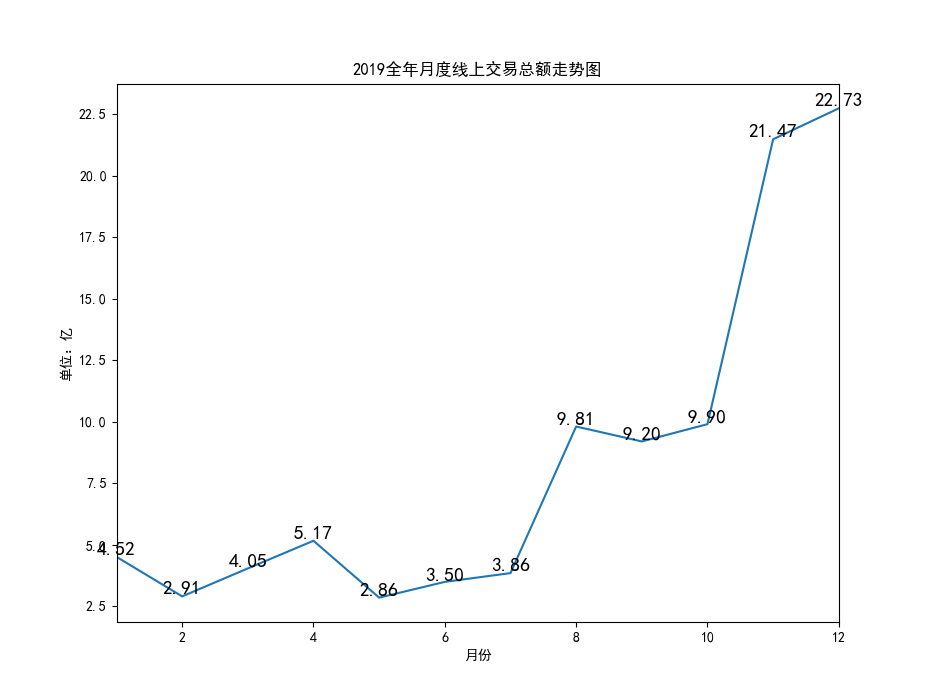

In [158]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

ax = df_need.plot(x='月份', y='cost', legend=False, title='2019全年月度线上交易总额走势图')
plt.ylabel('单位：亿')
for a, b in zip(df_need['月份'],df_need['cost']):
    ax.text(a, b, '%.2f' % b, ha='center', va='bottom', fontsize=14)
plt.show()

In [151]:
df_need_c = df_online_need.groupby('月份').agg('count').reset_index()
df_need_c

月份  打款总金额  产品名称  支付完成时间  cost
0    1    280   280     280   280
1    2    160   160     160   160
2    3    161   161     161   161
3    4    188   188     188   188
4    5    115   115     115   115
5    6     66    66      66    66
6    7    118   118     118   118
7    8    225   225     225   225
8    9    258   258     258   258
9   10    349   349     349   349
10  11    556   556     556   556
11  12    418   418     418   418

<IPython.core.display.Javascript object>


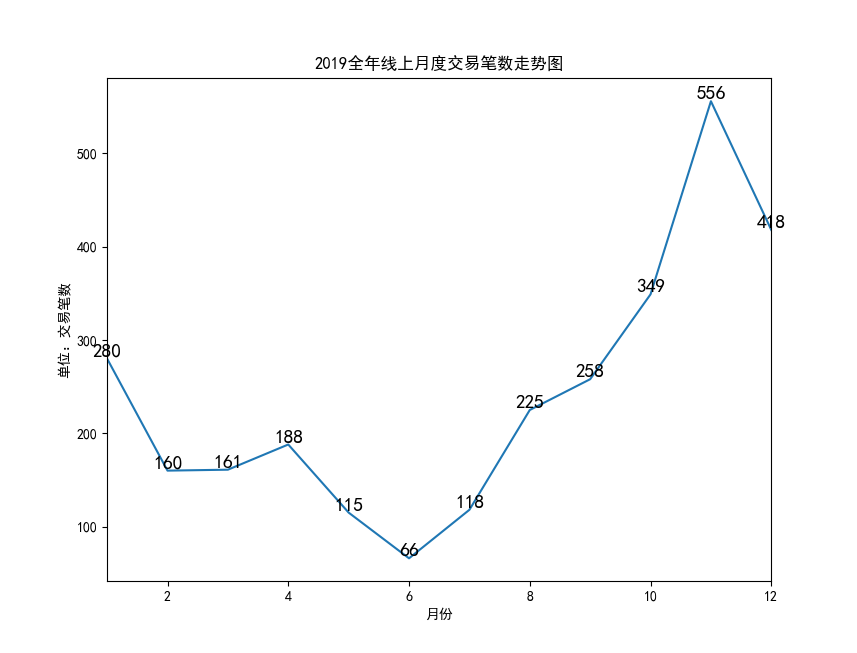

In [155]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

ax = df_need_c.plot(x='月份', y='cost', legend=False, title='2019全年线上月度交易笔数走势图')
plt.ylabel('单位：交易笔数')
for a, b in zip(df_need_c['月份'],df_need_c['cost']):
    ax.text(a, b, '%.0f' % b, ha='center', va='bottom', fontsize=14)

In [166]:
df_need_c['打款总金额'].sum()

2894

In [192]:
path = 'e:/开票信息/汇通天下石油化工（大连）有限公司.xls'
df = pandas.read_excel(path, sheetname=1)
df_sort = df[['exchange_good','Je']].groupby('exchange_good').agg('sum').sort_values('Je',ascending= False).reset_index()
df_sort['kind'] = df_sort['exchange_good'].apply(lambda x:x.split('*')[1])
df_sort['Je'] = df_sort['Je']/100000000
df_sort

exchange_good         Je    kind
0               *柴油*柴油  23.864902      柴油
1             *天然气*天然气   0.834198     天然气
2               *汽油*汽油   0.680395      汽油
3          *有机化学原料*异辛烷   0.216324  有机化学原料
4           *乙醇汽油*乙醇汽油   0.088912    乙醇汽油
5      *其他咨询服务*鉴证咨询服务费   0.011644  其他咨询服务
6      *鉴证咨询服务*鉴证咨询服务费   0.009765  鉴证咨询服务
7             *柴油*车用柴油   0.007406      柴油
8        *鉴证咨询服务*技术服务费   0.004546  鉴证咨询服务
9        *经纪代理服务*代理服务费   0.003868  经纪代理服务
10  *燃气**燃气*液化天然气（LNG）   0.002585      燃气
11    *柴油**柴油*车用柴油（VI）   0.001795      柴油

In [193]:
df_f = df_sort.groupby(by='kind', axis=0).agg('sum').sort_values('Je',ascending= False).reset_index()
df_f

kind         Je
0      柴油  23.874103
1     天然气   0.834198
2      汽油   0.680395
3  有机化学原料   0.216324
4    乙醇汽油   0.088912
5  鉴证咨询服务   0.014311
6  其他咨询服务   0.011644
7  经纪代理服务   0.003868
8      燃气   0.002585

<IPython.core.display.Javascript object>


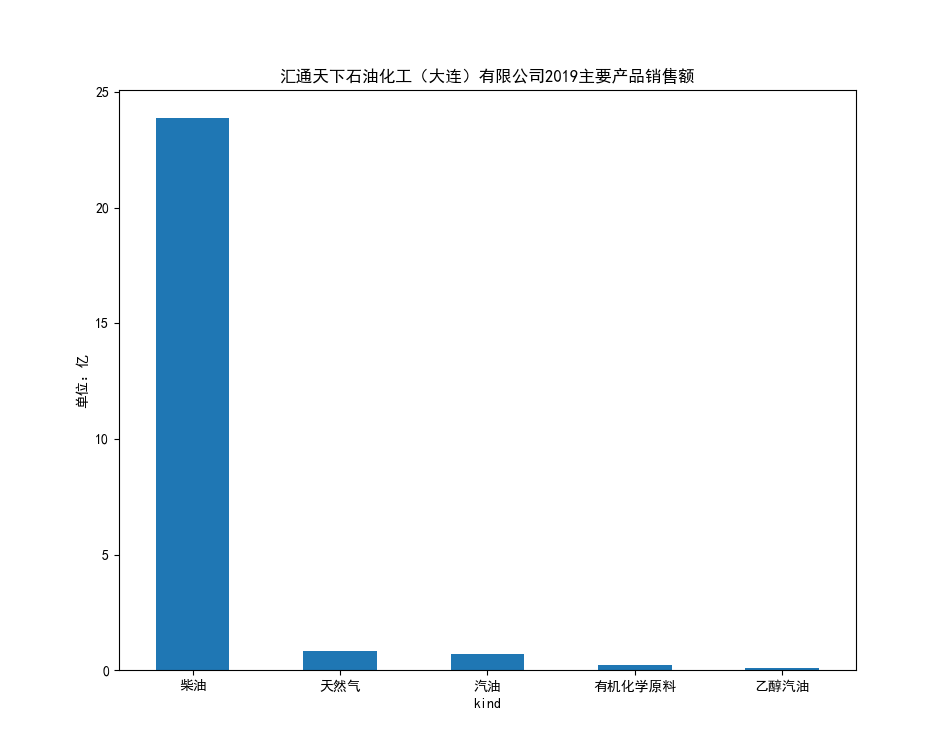

Text(0,0.5,'单位：亿')

In [194]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

df_f[:5].plot(kind='bar', x='kind', legend=False, rot=0, title='汇通天下石油化工（大连）有限公司2019主要产品销售额')
plt.ylabel('单位：亿')

In [195]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

path = 'e:/开票信息/大连海益石油化工有限公司.xls'
df = pandas.read_excel(path, sheetname=1)
df_sort = df[['exchange_good','Je']].groupby('exchange_good').agg('sum').sort_values('Je',ascending= False).reset_index()
df_sort['kind'] = df_sort['exchange_good'].apply(lambda x:x.split('*')[1])
df_sort['Je'] = df_sort['Je']/100000000
df_f = df_sort.groupby(by='kind', axis=0).agg('sum').sort_values('Je',ascending= False).reset_index()
df_f

kind        Je
0       原油  6.052193
1      燃料油  5.158245
2       汽油  1.739940
3       柴油  0.832814
4       沥青  0.784345
5     乙醇汽油  0.005457
6  非金属矿物制品  0.002748
7   有机化学原料  0.000873
8      印刷品  0.000192
9     金属制品  0.000142

<IPython.core.display.Javascript object>


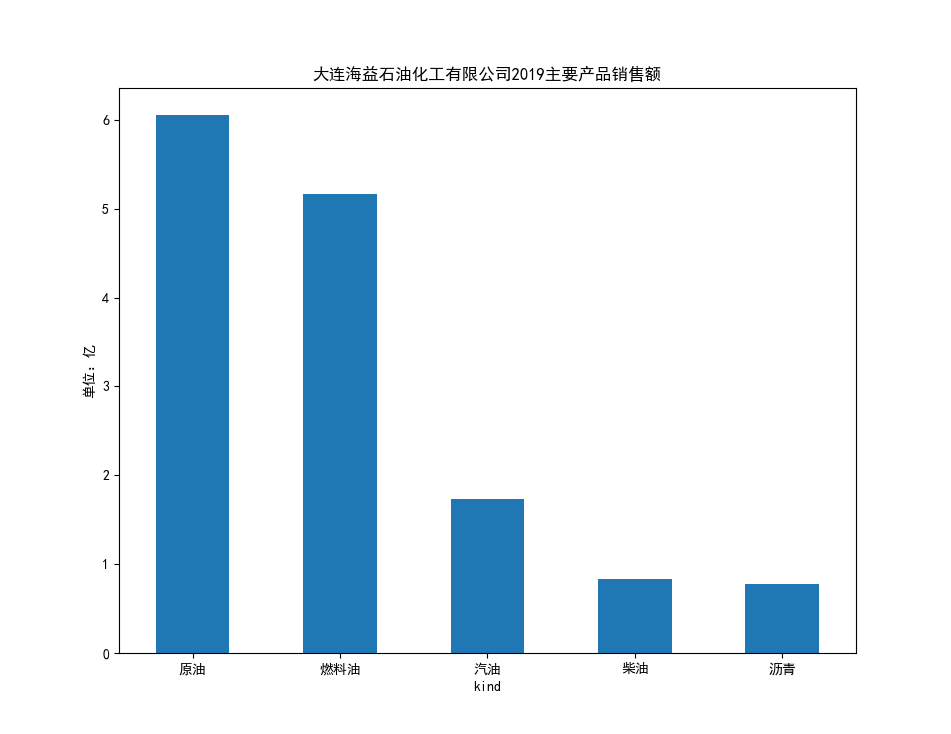

Text(0,0.5,'单位：亿')

In [199]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

df_f[:5].plot(kind='bar', x='kind', legend=False, rot=0, title='大连海益石油化工有限公司2019主要产品销售额')
plt.ylabel('单位：亿')

In [230]:
connection = pymysql.connect(host = '39.105.9.20',user = 'root',password = 'bigdata_oil',db = 'cxd_data',charset = 'utf8')

sql = "SELECT exchange_date,exchange_good,sum(Je) FROM financial_exchange \
WHERE Je > 100 and exchange_good != '*住宿服务*住宿费' and exchange_date >= '2019-01-01' group by exchange_good\
 order by sum(Je) desc"

df_goods = pandas.read_sql(sql, connection)
df_goods.head(10)

exchange_date    exchange_good       sum(Je)
0    2019-03-27     *航空煤油*3号喷气燃料  1.236437e+10
1    2019-01-14     *有机化学原料*混合芳烃  1.137832e+10
2    2019-03-22   *有机化学原料*甲基叔丁基醚  9.559434e+09
3    2019-03-28         *燃料油*燃料油  7.929691e+09
4    2019-01-02           *柴油*柴油  7.727376e+09
5    2019-01-23   *柴油*0号车用柴油（VI）  6.867277e+09
6    2019-03-22   *有色金属冶炼压延品*电解铜  5.984088e+09
7    2019-04-16      *有机化学原料*异辛烷  5.935589e+09
8    2019-01-24  *非成品油石油制品*有机热载体  5.818034e+09
9    2019-03-18      *有机化学原料*二甲苯  5.238244e+09

In [211]:
df_goods['exchange_good'][:100]

0            *航空煤油*3号喷气燃料
1            *有机化学原料*混合芳烃
2          *有机化学原料*甲基叔丁基醚
3                *燃料油*燃料油
4                  *柴油*柴油
5          *柴油*0号车用柴油（VI）
6          *有色金属冶炼压延品*电解铜
7             *有机化学原料*异辛烷
8         *非成品油石油制品*有机热载体
9             *有机化学原料*二甲苯
10                 *沥青*沥青
11       *汽油*92号车用汽油（VIA）
12          *燃料油*燃料油（燃料油）
13        *有机化学原料*石油混合二甲苯
14                *原油*原料油
15               *绝缘油*导热油
16            *有机化学原料*乙二醇
17        *非成品油石油制品*机械加工油
18       *汽油*92号车用汽油（VIA)
19             *林业产品*天然橡胶
20           *柴油*车用柴油（VI）
21               *柴油*车用柴油
22          *非成品油石油制品*原料油
23             *有机化学原料*芳烃
24            *汽油*95#车用汽油
25        *非成品油石油制品*轻质循环油
26               *石脑油*石脑油
27               *汽油*车用汽油
28          *汽油*车用汽油（VIA）
29       *汽油*92#车用汽油（VIA）
             ...         
70           *有机化学原料*MTBE
71     *有机化学原料*混合二甲苯（异构体）
72    *有机化学原料*5摄氏度石油混合二甲苯
73                *柴油*车用油
74        *柴油*-35号车用柴油（Ⅵ）
75            *汽油*95号车用汽油
76          *化学试剂助剂*戊烷发泡剂
77          

In [236]:
df_middle = df_goods.copy()
df_middle['exchange_good'] = df_middle['exchange_good'].apply(lambda x:x+'**')
df_middle['kind'] = df_middle['exchange_good'].apply(lambda x:x.split('*')[2])
df_v = df_middle.groupby(by='kind', axis=0).agg('sum').sort_values('sum(Je)',ascending= False).reset_index()
df_v

kind       sum(Je)
0                                        3号喷气燃料  1.239531e+10
1                                          混合芳烃  1.160581e+10
2                                        甲基叔丁基醚  9.560401e+09
3                                           燃料油  7.929691e+09
4                                            柴油  7.727820e+09
5                                    0号车用柴油（VI）  6.870603e+09
6                                           原料油  6.338649e+09
7                                           电解铜  5.984088e+09
8                                           异辛烷  5.935589e+09
9                                         有机热载体  5.820567e+09
10                                          二甲苯  5.238287e+09
11                                           沥青  5.188313e+09
12                                 92号车用汽油（VIA）  4.931459e+09
13                                     燃料油（燃料油）  3.939508e+09
14                                      石油混合二甲苯  3.736040e+09
15                                          导热油  3.672847e+09
16                                          乙二醇  3.536196e+09
17                                        机械加工油  3.435392e+09
18                                 92号车用汽油（VIA)  2.998816e+09
19                                         天然橡胶  2.707291e+09
20                                     车用柴油（VI）  2.698315e+09
21                                         车用柴油  2.662102e+09
22                                           芳烃  2.633927e+09
23                                      95#车用汽油  2.567594e+09
24                                        轻质循环油  2.489472e+09
25                                          石脑油  2.381722e+09
26                                         车用汽油  2.368379e+09
27                                    车用汽油（VIA）  2.139498e+09
28                                 92#车用汽油（VIA）  2.020857e+09
29                                           原油  1.970930e+09
...                                         ...           ...
5355                       OLAY美肌滋润沐浴乳紧致滋润400ML  1.230500e+02
5356                                     法定代表人章  1.226400e+02
5357                             舒肤佳青瓜清爽型香皂125克  1.214600e+02
5358                         护舒宝超级棉贴身量多日用/夜用卫生巾  1.204400e+02
5359                            丹碧丝隐形棉条元气系列小流量型  1.189200e+02
5360                              舒肤佳蜂蜜润护香皂125克  1.180900e+02
5361                         护舒宝超值干爽丝薄日用卫生巾10片包  1.165300e+02
5362                      OLAY美肌清爽沐浴露-沁醒清爽900毫升  1.164500e+02
5363                                         大瓦  1.163800e+02
5364                                     基础电信服务  1.160200e+02
5365                             伊卡璐迷迭薄荷水润舒缓润发乳  1.157200e+02
5366                                  92号汽油(国V)  1.150400e+02
5367                             沙宣轻润裸感洗发水500ML  1.144000e+02
5368                                         小瓦  1.120700e+02
5369                                        油底壳  1.120700e+02
5370                   佳洁士CREST3D炫白双效120克牙膏送90克  1.107100e+02
5371                                 佳洁士专业深洁型牙刷  1.096500e+02
5372                       OLAY美肌滋润沐浴乳洁净滋润400ML  1.093800e+02
5373                      OLAY美白滋润沐浴乳-深润滋养200毫升  1.080500e+02
5374                               飘柔滋润去屑洗发露5ML  1.077600e+02
5375                                         鼠标  1.077600e+02
5376                                海飞丝去屑洗发露丝柔型  1.077500e+02
5377                      锋隐超顺（银装版）1刀架+4刀头变形金刚版  1.072100e+02
5378                                        拉链袋  1.053400e+02
5379                      OLAY美肌清爽沐浴露-沁醒清爽200毫升  1.051300e+02
5380  齐心(Comix)IX894A4易分类分页PP年度索引纸12页(1-12)11孔隔  1.043100e+02
5381                                       商业电费  1.037900e+02
5382                      艾格特 墙面挂条 196 白色 AP CN  1.034500e+02
5383                                 水感透白光塑晶透眼霜  1.033200e+02
5384                                 舒肤佳泡沫洗手液樱花  1.028500e+02

[5385 rows x 2 columns]

In [242]:
df_v_part = df_v[~df_v['kind'].str.contains('柴油|汽油|航空煤油|喷气燃料|燃料油')]#去掉某字符串的筛选
df_v_part = df_v_part[:20]
df_v_part

kind       sum(Je)
1      混合芳烃  1.160581e+10
2    甲基叔丁基醚  9.560401e+09
6       原料油  6.338649e+09
7       电解铜  5.984088e+09
8       异辛烷  5.935589e+09
9     有机热载体  5.820567e+09
10      二甲苯  5.238287e+09
11       沥青  5.188313e+09
14  石油混合二甲苯  3.736040e+09
15      导热油  3.672847e+09
16      乙二醇  3.536196e+09
17    机械加工油  3.435392e+09
19     天然橡胶  2.707291e+09
22       芳烃  2.633927e+09
24    轻质循环油  2.489472e+09
25      石脑油  2.381722e+09
29       原油  1.970930e+09
30      石油焦  1.815972e+09
31    混合二甲苯  1.755045e+09
34    3号粗白油  1.645719e+09

In [235]:
df_big = df_goods.copy()
df_big['exchange_good'] = df_big['exchange_good'].apply(lambda x:x+'*')
df_big['kind'] = df_big['exchange_good'].apply(lambda x:x.split('*')[1])
df_f = df_big.groupby(by='kind', axis=0).agg('sum').sort_values('sum(Je)',ascending= False).reset_index()
df_f

kind       sum(Je)
0       有机化学原料  5.589671e+10
1           柴油  3.301666e+10
2           汽油  3.241918e+10
3     非成品油石油制品  2.515193e+10
4         航空煤油  1.325967e+10
5          燃料油  1.235052e+10
6           沥青  6.807326e+09
7           原油  6.007010e+09
8    有色金属冶炼压延品  5.985570e+09
9          绝缘油  4.062503e+09
10      化学合成材料  3.122509e+09
11        林业产品  2.707291e+09
12         石脑油  2.604809e+09
13          煤炭  2.330533e+09
14   黑色金属冶炼压延品  2.113526e+09
15        液体石蜡  1.716530e+09
16         液化气  1.709997e+09
17     非金属矿物制品  1.139376e+09
18      化学试剂助剂  1.138109e+09
19   乙醇汽油调和组分油  1.097902e+09
20       石油焦制品  6.753078e+08
21        乙醇汽油  6.621965e+08
22      黑色金属矿石  6.222389e+08
23    非成品油焦油制品  3.943958e+08
24      其他化学制品  3.562032e+08
25        运输服务  3.200429e+08
26      变性燃料乙醇  2.957219e+08
27       液化天然气  2.209494e+08
28      无机化学原料  1.895383e+08
29          燃气  1.552252e+08
..         ...           ...
125    家用厨房电器具  2.078276e+04
126       海水产品  1.998593e+04
127      水产加工品  1.749506e+04
128    家用清洁电器具  1.465431e+04
129        印刷品  1.408558e+04
130     移动通信设备  1.391808e+04
131         教具  1.180326e+04
132       工业车辆  1.030173e+04
133     家用制冷器具  9.482760e+03
134         家具  9.151720e+03
135   复印胶版印制设备  8.012930e+03
136         帽子  7.331610e+03
137     试验检测机械  6.902660e+03
138        溶剂油  6.194690e+03
139     交通运输设备  5.951710e+03
140       发电机组  5.150440e+03
141       生活服务  3.061320e+03
142          鞋  2.614160e+03
143     其他电子设备  1.839660e+03
144       餐饮服务  1.320760e+03
145       电子元件  1.119830e+03
146         文具  6.681000e+02
147     小型起重设备  6.637200e+02
148    家用电热电力器  6.362100e+02
149       电信服务  5.704300e+02
150       设计服务  5.660400e+02
151     绘图测量仪器  4.396600e+02
152      果类加工品  3.827700e+02
153       焙烤食品  3.485300e+02
154        水冰雪  1.611600e+02

[155 rows x 2 columns]

In [244]:
df_f_part = df_f[df_f['kind'].str.contains('柴油|汽油|航空煤油|燃料油')]
df_f_part = df_f_part[:4]
df_f_part

kind       sum(Je)
1    柴油  3.301666e+10
2    汽油  3.241918e+10
4  航空煤油  1.325967e+10
5   燃料油  1.235052e+10

<IPython.core.display.Javascript object>


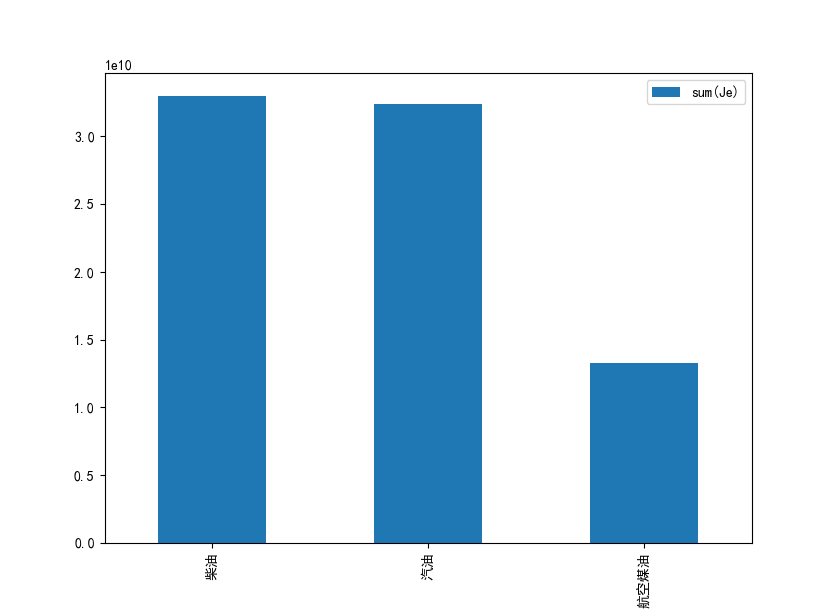

In [223]:
df_f[(df_f['kind']=='柴油')|(df_f['kind']=='汽油')|(df_f['kind']=='航空煤油')].plot(kind='bar', x='kind')

<IPython.core.display.Javascript object>


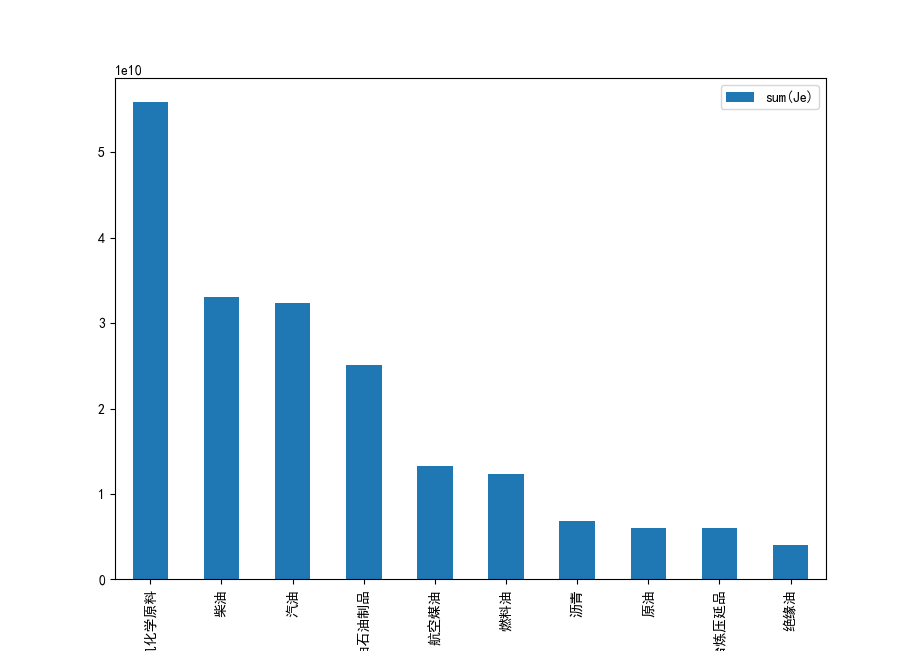

In [225]:
df_f[:10].plot(kind='bar', x='kind',rot=90)

In [262]:
connection = pymysql.connect(host = '39.105.9.20',user = 'root',password = 'bigdata_oil',db = 'cxd_data',charset = 'utf8')

sql = "SELECT exchange_good,sum(Je) FROM financial_exchange \
WHERE Je > 100 and exchange_good like '%重质油%' and exchange_date >= '2019-01-01' group by exchange_good\
 order by sum(Je) desc"

df_t = pandas.read_sql(sql, connection)
df_t

exchange_good      sum(Je)
0  *非成品油石油制品*重质油  11330024.36
1        *原油*重质油   1795807.56

In [297]:
df_merge = df_f_part.append(df_v_part, ignore_index=True).reset_index()
df_merge.drop(['index'],axis=1, inplace=True)
df_final = df_merge.sort_values(by='sum(Je)',ascending= False).reset_index()
df_final.drop(df_final.index[[7]],axis=0,inplace=True)
df_final = df_final.reset_index()
df_final

level_0  index     kind       sum(Je)
0         0      0       柴油  3.301666e+10
1         1      1       汽油  3.241918e+10
2         2      2     航空煤油  1.325967e+10
3         3      3      燃料油  1.235052e+10
4         4      4     混合芳烃  1.160581e+10
5         5      5   甲基叔丁基醚  9.560401e+09
6         6      6      原料油  6.338649e+09
7         8      8      异辛烷  5.935589e+09
8         9      9    有机热载体  5.820567e+09
9        10     10      二甲苯  5.238287e+09
10       11     11       沥青  5.188313e+09
11       12     12  石油混合二甲苯  3.736040e+09
12       13     13      导热油  3.672847e+09
13       14     14      乙二醇  3.536196e+09
14       15     15    机械加工油  3.435392e+09
15       16     16     天然橡胶  2.707291e+09
16       17     17       芳烃  2.633927e+09
17       18     18    轻质循环油  2.489472e+09
18       19     19      石脑油  2.381722e+09
19       20     20       原油  1.970930e+09
20       21     21      石油焦  1.815972e+09
21       22     22    混合二甲苯  1.755045e+09
22       23     23    3号粗白油  1.645719e+09

In [298]:
df_draw = df_final
print(len(df_draw))
df_draw.loc[6,'kind'] = '石油原油'
df_draw.loc[2,'kind'] = '煤油'
df_draw.loc[6,'sum(Je)'] += df_draw.loc[19,'sum(Je)']#原油加到原料油
df_draw.loc[12,'sum(Je)'] += df_draw.loc[8,'sum(Je)'] #
df_draw.drop(df_draw.index[[8,19]],axis=0,inplace=True)
df_draw

23


level_0  index     kind       sum(Je)
0         0      0       柴油  3.301666e+10
1         1      1       汽油  3.241918e+10
2         2      2       煤油  1.325967e+10
3         3      3      燃料油  1.235052e+10
4         4      4     混合芳烃  1.160581e+10
5         5      5   甲基叔丁基醚  9.560401e+09
6         6      6     石油原油  8.309579e+09
7         8      8      异辛烷  5.935589e+09
9        10     10      二甲苯  5.238287e+09
10       11     11       沥青  5.188313e+09
11       12     12  石油混合二甲苯  3.736040e+09
12       13     13      导热油  9.493414e+09
13       14     14      乙二醇  3.536196e+09
14       15     15    机械加工油  3.435392e+09
15       16     16     天然橡胶  2.707291e+09
16       17     17       芳烃  2.633927e+09
17       18     18    轻质循环油  2.489472e+09
18       19     19      石脑油  2.381722e+09
20       21     21      石油焦  1.815972e+09
21       22     22    混合二甲苯  1.755045e+09
22       23     23    3号粗白油  1.645719e+09

In [299]:
df_last = df_draw
df_last.drop(['level_0','index'],axis=1, inplace=True)
df_last = df_last.sort_values('sum(Je)',ascending= False).reset_index()
df_last.drop(['index'],axis=1, inplace=True)
df_last

kind       sum(Je)
0        柴油  3.301666e+10
1        汽油  3.241918e+10
2        煤油  1.325967e+10
3       燃料油  1.235052e+10
4      混合芳烃  1.160581e+10
5    甲基叔丁基醚  9.560401e+09
6       导热油  9.493414e+09
7      石油原油  8.309579e+09
8       异辛烷  5.935589e+09
9       二甲苯  5.238287e+09
10       沥青  5.188313e+09
11  石油混合二甲苯  3.736040e+09
12      乙二醇  3.536196e+09
13    机械加工油  3.435392e+09
14     天然橡胶  2.707291e+09
15       芳烃  2.633927e+09
16    轻质循环油  2.489472e+09
17      石脑油  2.381722e+09
18      石油焦  1.815972e+09
19    混合二甲苯  1.755045e+09
20    3号粗白油  1.645719e+09

In [300]:
df_last['sum(Je)'] = df_last['sum(Je)']/100000000
df_last

kind     sum(Je)
0        柴油  330.166593
1        汽油  324.191804
2        煤油  132.596674
3       燃料油  123.505194
4      混合芳烃  116.058086
5    甲基叔丁基醚   95.604008
6       导热油   94.934138
7      石油原油   83.095794
8       异辛烷   59.355892
9       二甲苯   52.382868
10       沥青   51.883127
11  石油混合二甲苯   37.360397
12      乙二醇   35.361962
13    机械加工油   34.353923
14     天然橡胶   27.072910
15       芳烃   26.339269
16    轻质循环油   24.894720
17      石脑油   23.817219
18      石油焦   18.159719
19    混合二甲苯   17.550446
20    3号粗白油   16.457186

In [304]:
df_last['sum(Je)'].sum()*100000000

172514193030.9203

<IPython.core.display.Javascript object>


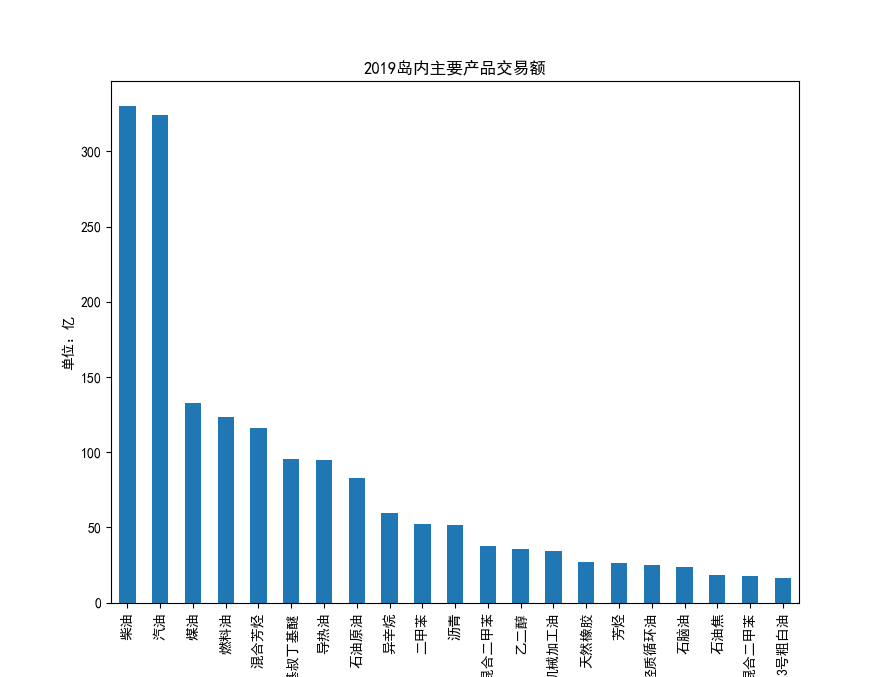

Text(0,0.5,'单位：亿')

In [301]:
df_last.plot(kind='bar', x='kind', y='sum(Je)', title='2019岛内主要产品交易额', legend=False)
plt.ylabel('单位：亿')